# Projet 3 : Anticipez les besoins en consommation électrique de bâtiments

### Notebook Exploration

Consignes : https://openclassrooms.com/fr/paths/148/projects/629/assignment

Data : 

https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy 
https://data.seattle.gov/dataset/2017-Building-Energy-Benchmarking/qxjw-iwsh
https://data.seattle.gov/browse?q=BUILDING&sortBy=relevance

Dans ce projet, nous chercherons à prédire les valeurs d'émission de CO2 et des consommations d'énergie des batiments en fonction de leurs caractéristiques.

On cherchera à prédire :

- La consommation d'énergie : SiteEnergyUseWN(kBtu)
- Les émissions de CO2: GHGEmissions(MetricTonsCO2e) en 2015 / TotalGHGEmissions en 2016

# Import Bibliothèque

In [1]:
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

On importe plusieurs jeux de données. Les données relevés en 2015, 2016 et 2017

In [2]:
Data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
Data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
Data_2017 = pd.read_csv("2017_Building_Energy_Benchmarking (1).csv")

In [3]:
print(f"Nombre de Colonnes données 2016 : {Data.shape[0]}")
print(f"Nombre de Lignes données 2016 : {Data.shape[1]}")
print(f"Nombre de Colonnes données 2015 : {Data_2015.shape[0]}")
print(f"Nombre de Lignes données 2015 : {Data_2015.shape[1]}")
print(f"Nombre de Colonnes données 2017 : {Data_2017.shape[0]}")
print(f"Nombre de Lignes données 2017 : {Data_2017.shape[1]}")

Nombre de Colonnes données 2016 : 3376
Nombre de Lignes données 2016 : 46
Nombre de Colonnes données 2015 : 3340
Nombre de Lignes données 2015 : 47
Nombre de Colonnes données 2017 : 3461
Nombre de Lignes données 2017 : 45


In [4]:
def taux_remplissage(data):
    """
    Voir les valeurs manquantes  et le taux de remplissage des données 
    """
    var_dict = {} ## Création d'un dictionnaire permettant de stocker les 
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["% du dataset complet", "Nombre de valeurs manquantes"]).sort_values(by="% du dataset complet", ascending=False)

In [5]:
Data_2015.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [6]:
taux_remplissage(Data_2015)

,% du dataset complet,Nombre de valeurs manquantes
OSEBuildingID,100.00,0
YearBuilt,100.00,0
ComplianceStatus,100.00,0
DataYear,100.00,0
PropertyGFABuilding(s),100.00,0
PropertyGFAParking,100.00,0
PropertyGFATotal,100.00,0
NumberofBuildings,100.00,0
Zip Codes,100.00,0
Neighborhood,100.00,0


Des données de 2015 majoritairement Complètes.

In [7]:
Data_2017.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier
0,1,2017,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,N,Compliant,NaN
1,2,2017,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,N,Compliant,NaN
2,3,2017,Campus,Hotel,84SC9-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,N,Compliant,NaN
3,5,2017,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101.0,0659000640,...,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,N,Compliant,NaN
4,8,2017,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,N,Compliant,NaN


In [8]:
taux_remplissage(Data_2017)

,% du dataset complet,Nombre de valeurs manquantes
OSEBuildingID,100.00,0
TaxParcelIdentificationNumber,100.00,0
GHGEmissionsIntensity,100.00,0
DefaultData,100.00,0
ComplianceStatus,100.00,0
PropertyGFATotal,100.00,0
TotalGHGEmissions,100.00,0
DataYear,100.00,0
State,100.00,0
City,100.00,0


Des données de 2015 majoritairement Complètes.

In [9]:
pd.set_option("display.max_columns", 2000)
Data.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Fusion des données

On fusionne les 3 données

In [10]:
Data = pd.concat([Data,Data_2015])
Data =  pd.concat([Data,Data_2017])

In [11]:
Data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Comment,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,False,NaN,Compliant,NaN,249.98,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,False,NaN,Compliant,NaN,295.86,2.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,False,NaN,Compliant,NaN,2089.28,2.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,False,NaN,Compliant,NaN,286.43,4.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,False,NaN,Compliant,NaN,505.01,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,50265,2017,Multifamily LR (1-4),NaN,NaN,1861 16TH AVE,SEATTLE,WA,NaN,8080400145,1.0,EAST,47.61826,-122.31184,1906.0,NaN,4.0,39984,9234.0,30750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Compliant,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3457,50268,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Decibel Apartments,301 12th Ave,Seattle,WA,98122.0,2197600742,3.0,EAST,47.60451,-122.31711,2016.0,1.0,7.0,69656,8477.0,61179.0,"Multifamily Housing, Parking",Multifamily,71695.0,Parking,5651.0,NaN,NaN,NaN,100.0,18.800000,18.8

In [12]:
Data = Data.set_index("OSEBuildingID")

On supprime la colonne "DataYear" et on supprime les lignes en doublon. 

In [13]:
Data = Data.drop(columns = ["DataYear"])
Data.drop_duplicates(keep = 'first', inplace=True)

In [14]:
Data

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Comment,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,False,NaN,Compliant,NaN,249.98,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,False,NaN,Compliant,NaN,295.86,2.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,False,NaN,Compliant,NaN,2089.28,2.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,False,NaN,Compliant,NaN,286.43,4.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,False,NaN,Compliant,NaN,505.01,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50265,Multifamily LR (1-4),NaN,NaN,1861 16TH AVE,SEATTLE,WA,NaN,8080400145,1.0,EAST,47.61826,-122.31184,1906.0,NaN,4.0,39984,9234.0,30750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Compliant,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50268,Multifamily MR (5-9),Mid-Rise Multifamily,Decibel Apartments,301 12th Ave,Seattle,WA,98122.0,2197600742,3.0,EAST,47.60451,-122.31711,2016.0,1.0,7.0,69656,8477.0,61179.0,"Multifamily Housing, Parking",Multifamily,71695.0,Parking,5651.0,NaN,NaN,NaN,100.0,18.800000,18.800000,36.500000,36

Dans la réalité, il est possible qu'un batiment n'ait pas les mêmes consommations et émissions d'une année à une autre. Cela va dépendre de plusieurs paramètres (Ex : Batiment - Température extérieur qui varie) Cela n'affecte pas nos résultats si le batiment n'a pas les mêmes consommations d'une année à une autre. On garde les lignes avec le même ID. 

In [14]:
Data = Data.reset_index()

# Milestones 1  Analyse exploratoire des datasets et feature engineering

Dans cette première, nous allons faire un état des lieux des données. Puis nous allons modifier les données ainsi que supprimer les valeurs abberantes.

In [15]:
Data.describe()

,OSEBuildingID,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,10177.000000,6800.00000,10160.000000,6820.000000,6820.000000,10176.000000,10148.000000,10162.000000,1.017700e+04,8860.000000,8.860000e+03,9.999000e+03,4984.000000,1766.000000,7548.000000,10127.000000,10115.000000,10125.000000,10112.000000,1.012900e+04,1.011500e+04,6.834000e+03,1.013100e+04,1.013100e+04,8.887000e+03,8.887000e+03,0.0,6828.000000,6828.00000,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,21156.942321,98117.04500,4.433465,47.624309,-122.334860,1968.584021,1.091545,4.717280,9.442647e+04,11212.134199,8.753406e+04,7.817905e+04,28366.474377,11433.309965,69.018813,130.061459,130.874317,209.908711,211.628303,2.241694e+07,2.219416e+07,4.754653e+05,1.070638e+06,3.653065e+06,1.591901e+04,1.591901e+06,NaN,120.239214,1.17240,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,12180.611611,18.90448,2.129137,0.047582,0.027163,33.174041,1.820515,5.415033,2.000548e+05,38300.629809,1.960894e+05,1.796280e+05,54033.014939,27303.502070,26.862204,7528.460326,7420.694326,7532.700593,7425.275868,1.713754e+09,1.689374e+09,5.663818e+06,3.910008e+06,1.334104e+07,7.235079e+04,7.235079e+06,NaN,570.103269,2.01760,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,98006.00000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.672730e+04,-1.253136e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.02000,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19986.000000,98105.00000,3.000000,47.600335,-122.350740,1948.000000,1.000000,2.000000,2.858600e+04,0.000000,2.750300e+04,2.513700e+04,5000.000000,2351.000000,53.000000,28.000000,29.200001,75.200000,78.400000,9.416889e+05,9.785065e+05,0.000000e+00,1.894609e+05,6.464540e+05,0.000000e+00,0.000000e+00,NaN,7.820000,0.17175,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,23108.000000,98115.00000,4.000000,47.618900,-122.332610,1975.000000,1.000000,4.000000,4.443200e+04,0.000000,4.338350e+04,3.988800e+04,10700.000000,5100.000000,77.000000,38.900002,40.599998,97.200000,101.000000,1.837841e+06,1.915847e+06,0.000000e+00,3.457000e+05,1.179577e+06,4.903000e+03,4.902610e+05,NaN,33.065000,0.59750,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25976.000000,98122.00000,7.000000,47.657150,-122.319187,1997.000000,1.000000,5.000000,9.113000e+04,0.000000,8.545975e+04,7.552100e+04,26662.750000,10234.750000,91.000000,61.450001,64.199997,145.000000,148.225000,4.253578e+06,4.381179e+06,0.000000e+00,8.333718e+05,2.843524e+06,1.420100e+04,1.420116e+06,NaN,94.622500,1.38000,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50289.000000,98272.00000,7.000000,47.733870,-122.220966,2017.000000,111.000000,99.000000,9.320156e+06,686750.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,757644.500000,746358.120000,757968.500000,746681.000000,1.724702e+11,1.699009e+11,2.579914e+08,1.960263e+08,6.688416e+08,4.169035e+06,4.169035e+08,NaN,22813.610

## Données

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10177 entries, 0 to 10176
Data columns (total 55 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  10177 non-null  int64  
 1   BuildingType                                                   10177 non-null  object 
 2   PrimaryPropertyType                                            10172 non-null  object 
 3   PropertyName                                                   10156 non-null  object 
 4   Address                                                        6837 non-null   object 
 5   City                                                           6837 non-null   object 
 6   State                                                          6837 non-null   object 
 7   ZipCode                                                   

On recense des données sous format catégorielle, numérique et booléen.

In [17]:
print(f"Nombre de Colonnes : {Data.shape[0]}")
print(f"Nombre de Lignes : {Data.shape[1]}")

Nombre de Colonnes : 10177
Nombre de Lignes : 55


## Données manquantes

On met en place une fonction permettant de quantifier le manque de données par variable du dataset.

In [18]:
taux_remplissage(Data)

,% du dataset complet,Nombre de valeurs manquantes
OSEBuildingID,100.00,0
ComplianceStatus,100.00,0
PropertyGFATotal,100.00,0
BuildingType,100.00,0
YearBuilt,99.99,1
DefaultData,99.99,1
TaxParcelIdentificationNumber,99.98,2
PrimaryPropertyType,99.95,5
NumberofFloors,99.85,15
CouncilDistrictCode,99.83,17


On observe un data set très complet. Seulement 14 features sur 54 ont des données très incomplètes (inférieurs à 50%). 
Nous allons étudier la variable "Outlier". 

Il ya des données présentes dans certaines années et d'en d'autres non. On va essayé de supprimer le maximum de colonnes avec des données manquantes.

La variable "3 eme propriété" correspond à la présence ou non d'une troisième propriété chez le propriétaire. Quand la donnée est incomplète cela signifie que le propriétaire n'a pas de 3 ème propriété. La donnée est complètée à 17%, un grand nombre de propriété n'est pas concerné par cette variable. Nous avons décidé d'écarté cette variable pour notre prédiction.

Les données "YearsENERGYSTARCertified", "Comments","Commeny", "YearsENERGYSTARCertified", "City Council Districts"  sont très incomplètes, nous les écartons aussi.

In [19]:
Data_origin = Data.copy()

In [20]:
###Colonnes qu'on va supprimer
## Les colonnes avec le moins de données complètes
#'ThirdLargestPropertyUseType',"ThirdLargestPropertyUseTypeGFA",
colonnes_drop = [
                
                 "YearsENERGYSTARCertified",
                 "Comments","Comment","YearsENERGYSTARCertified",
                    "Location",
                    "OtherFuelUse(kBtu)",
                    "GHGEmissions(MetricTonsCO2e)",
                    "GHGEmissionsIntensity(kgCO2e/ft2)","City Council Districts","2010 Census Tracts",
                    "Zip Codes","Seattle Police Department Micro Community Policing Plan Areas","SPD Beats"
                  ]

On stock des variables dans une liste qui vont nous permettre de supprimer les colonnes dans le dataset.

In [21]:
colonnes_to_drop =[]

On crée un deuxième liste qui va compotrer le nom des colonnes que nous allons supprimmer. La liste va être remplie au fur et à mesure.

In [22]:
Data = Data.drop(columns = colonnes_drop )

# Features supplémantaires

## Feature Outliers

On transforme la variable "Outliers" en données numérique.

In [24]:
Data[['Outlier']] = Data[['Outlier']].fillna("Ok")

In [25]:
def transform_type_Outliers (df, colonne):
    
    New_Data_Res = []
    build_types = list(df[colonne])

    
    for i in range(len(build_types)) :
        
        by = build_types[i].lower()

        if  ("ok" in by) : 
            New_Data_Res.append(0)
        
        elif  ("low" in by) :
            New_Data_Res.append(1)
        
            
        else :
            New_Data_Res.append(2)  
    
    return New_Data_Res

In [26]:
Data['Outlier Cat'] = transform_type_Outliers(Data,'Outlier')

Les usestype "third" et "second" avec des valeurs NAN sont propriétés inexistantes. On peut les remplacer par "no use".

On remplace les autres valeurs "NAN" de Uses type par "Other". On met en place cela pour pouvoir transformer les variables qualitatives uses type en valeurs quantitatives.

In [27]:
Data["ThirdLargestPropertyUseType"] = Data["ThirdLargestPropertyUseType"].fillna("no use")
Data["SecondLargestPropertyUseType"] = Data["SecondLargestPropertyUseType"].fillna("no use")
Data["LargestPropertyUseType"] = Data["LargestPropertyUseType"] .fillna("other")
Data["PrimaryPropertyType"] = Data["PrimaryPropertyType"].fillna('other')

In [28]:
Data["LargestPropertyUseType"].value_counts()

Multifamily Housing                           3265
Multifamily                                   1739
Office                                        1486
K-12 School                                    418
Non-Refrigerated Warehouse                     393
                                              ... 
Food Servic                                      1
Enclosed Ma                                      1
Wholesale C                                      1
Outpatient Rehabilitation/Physical Therapy       1
Residential                                      1
Name: LargestPropertyUseType, Length: 101, dtype: int64

On met en place une fonction qui va transformer les variables quantitatives "Usestype" en variables numérique.

In [29]:
def transform_type (df, colonne):
    
    New_Data_Res = []
    build_types = list(df[colonne])

    
    for i in range(len(build_types)) :
        
        by = build_types[i].lower()

        if  ("hotel" in by)  or("museum" in by) or ("data" in by) : 
            New_Data_Res.append(0.9)
        
        elif  ("care" in by) or ("clinic" in by) or ("hospital" in by) :
            New_Data_Res.append(0.85)
            
        elif  ("college"  in by) or ("university" in by) or ("school" in by) or ("education" in by): 
            New_Data_Res.append(0.7)
            
        elif ( "office" in by) or ("bank" in by ) or ("financial" in by ) or ("service" in by)  : 
            New_Data_Res.append(0.65)
            
        elif  ("refrigerated warehouse" in by) or ("retail" in by)  or ("restaurant" in by) or ("supermarket" in by) or ("grocery" in by ) or ("store" in by) or ("food" in by): 
            New_Data_Res.append(0.55)
            
        elif  ("plant" in by) or ("automobile" in by)  or ("repair" in by) or ("industrial" in by) : 
            New_Data_Res.append(0.5)
        
        elif ("parking" in by ) or ("recreation") : 
            New_Data_Res.append(0.4)
        
        elif ("residential" in by ) or ("family" in by) or ("residence" in by) : 
            New_Data_Res.append(0.3)
        
        elif ("non-refrigerated warehouse" in by)  : 
            New_Data_Res.append(0.8)
            
        elif ("no use" in by ) :
            New_Data_Res.append(0.05)
            
        else :
            New_Data_Res.append(0.1)  
    
    return New_Data_Res

On applique la fonction aux colonnes originales.

In [30]:
Data["LargestPropertyUseType"] = transform_type(Data,"LargestPropertyUseType")
Data["SecondLargestPropertyUseType"] =transform_type(Data,"SecondLargestPropertyUseType")
Data["ThirdLargestPropertyUseType"] =transform_type(Data,"ThirdLargestPropertyUseType")
Data["PrimaryPropertyType"] =transform_type(Data,"PrimaryPropertyType")

Text(0.5, 1.0, 'Graphique de type dE Use type')

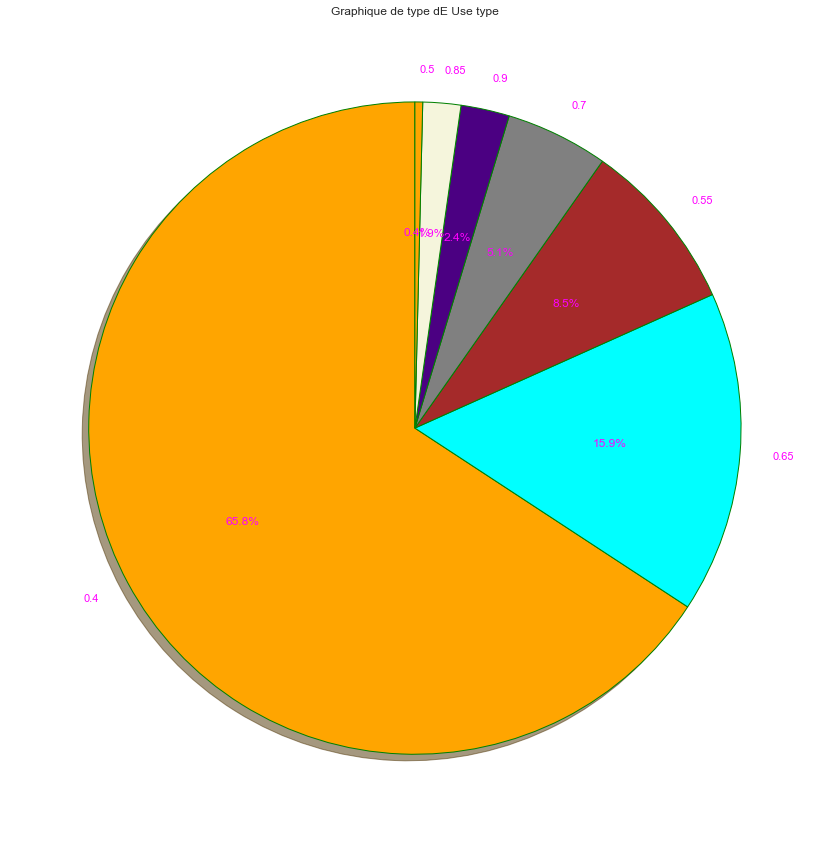

In [31]:
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
sns.set(rc = {'figure.figsize':(20,15)})
data_chart= pd.DataFrame(data = Data["LargestPropertyUseType"].value_counts()).reset_index() 
data_chart = data_chart.rename(columns = {"LargestPropertyUseType":"Count","index":"Type"})
data_chart = data_chart.set_index("Type")
plt.pie(x = "Count", data= data_chart ,autopct="%.1f%%", labels = data_chart .index ,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
plt.title("Graphique de type dE Use type")


Voici les valeurs obtenues.

In [32]:
Data["PrimaryPropertyType"].value_counts()

0.40    7091
0.65    1538
0.55     653
0.70     504
0.90     226
0.85     165
Name: PrimaryPropertyType, dtype: int64

## Création des features "Proportion énergie"

In [34]:
Data["Total energy"] = Data["SteamUse(kBtu)"]+Data["Electricity(kBtu)"]+Data["NaturalGas(kBtu)"]
colonnes_to_drop.append("Total energy")

On crée trois variables qui vont représenter la proportion des 3 types de consommation d'énergie par rapport à la consommation d'énergie totale (Récalculée).

In [36]:
Data["Electricity(kBtu) %"] = Data["Electricity(kBtu)"]/Data["Total energy"]
Data["SteamUse(kBtu) %"] = Data["SteamUse(kBtu)"]/Data["Total energy"]
Data["NaturalGas(kBtu) %"] =  Data["NaturalGas(kBtu)"] /Data["Total energy"]

## Number floor

On remplace les étages 0 par 1. On estime que les relevés de floors =0 sont des rez-de chaussés. Donc ils peuvent être associés à un étage.

On crée une nouvelle variable "Surface oar étage".

In [37]:
Data["NumberofFloors"] = Data["NumberofFloors"].replace(0,1)
Data["GFA_by_floor"] = round(Data["PropertyGFATotal"] / Data["NumberofFloors"])
Data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Total energy,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
0,1,NonResidential,0.9,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,0.9,88434.0,0.4,NaN,0.40,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,Ok,249.98,2.83,0,7226362.00,0.546060,0.277302,0.176638,7370.0
1,2,NonResidential,0.9,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",0.9,83880.0,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,Ok,295.86,2.86,0,8387933.00,0.386609,0.000000,0.613391,9415.0
2,3,NonResidential,0.9,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,Hotel,0.9,756493.0,0.4,NaN,0.40,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,Ok,2089.28,2.19,0,72587018.00,0.682307,0.297113,0.020579,23320.0
3,5,NonResidential,0.9,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,0.9,61320.0,0.4,NaN,0.40,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,Ok,286.43,4.67,0,6794583.25,0.407519,0.325913,0.266567,6132.0
4,8,NonResidential,0.9,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",0.9,123445.0,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,Ok,505.01,2.88,0,14172605.00,0.378802,0.000000,0.621198,9754.0


## Nombre batiment

On crée une variable montrant s'il y a un batiment ou plus.

In [38]:
Data["more_one_building"] = (Data["NumberofBuildings"]>1).astype(int)
Data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Total energy,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building
0,1,NonResidential,0.9,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,0.9,88434.0,0.4,NaN,0.40,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,Ok,249.98,2.83,0,7226362.00,0.546060,0.277302,0.176638,7370.0,0
1,2,NonResidential,0.9,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",0.9,83880.0,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,Ok,295.86,2.86,0,8387933.00,0.386609,0.000000,0.613391,9415.0,0
2,3,NonResidential,0.9,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,Hotel,0.9,756493.0,0.4,NaN,0.40,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,Ok,2089.28,2.19,0,72587018.00,0.682307,0.297113,0.020579,23320.0,0
3,5,NonResidential,0.9,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,0.9,61320.0,0.4,NaN,0.40,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,Ok,286.43,4.67,0,6794583.25,0.407519,0.325913,0.266567,6132.0,0
4,8,NonResidential,0.9,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",0.9,123445.0,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,Ok,505.01,2.88,0,14172605.00,0.378802,0.000000,0.621198,9754.0,0


### Année construction 

In [39]:
Data["YearBuilt"].describe()

count    10176.000000
mean      1968.584021
std         33.174041
min       1900.000000
25%       1948.000000
50%       1975.000000
75%       1997.000000
max       2017.000000
Name: YearBuilt, dtype: float64

On crée une nouvelle variable associée à l'année de construction. Pour visualiser les tranches des années en proportion.

In [40]:
def Tranche_année(df):
    
    Tranche_année= []
    build_years = list(df["YearBuilt"])

    
    for i in range(len(build_years)) :
        
        by = build_years[i]

        if   by < 1920 : 
            Tranche_année.append(1)
            
        elif  1920 <= by < 1940 : 
            Tranche_année.append(2)
            
        elif  1940 <= by < 1960 : 
            Tranche_année.append(3)
            
        elif  1960 <=  by < 1980 : 
            Tranche_année.append(4)
            
        elif  1980 <= by < 2000 : 
            Tranche_année.append(5)
            
        else :
            Tranche_année.append(6)  
    
    return Tranche_année

In [41]:
Data["Tranche YearBuilt"] = Tranche_année(Data)

In [42]:
Data["Tranche YearBuilt"].unique()

array([2, 5, 4, 1, 6, 3], dtype=int64)

([<matplotlib.patches.Wedge at 0x29830594ee0>,
 [Text(0.807302271026234, 0.7471700229505231, '5'),
  Text(-0.6463165082057664, 0.8900982930107808, '4'),
  Text(-0.9958555912319984, -0.4671955066264733, '6'),
  Text(-0.09174563128822712, -1.0961672952334989, '1'),
  Text(0.6605205928646802, -0.879609314640137, '2'),
  Text(1.055363950908379, -0.3101724216029798, '3')],
 [Text(0.4403466932870367, 0.40754728524573985, '23.8%'),
  Text(-0.3525362772031453, 0.48550815982406215, '22.5%'),
  Text(-0.5431939588538173, -0.25483391270534905, '21.5%'),
  Text(-0.05004307161176024, -0.5979094337637266, '11.9%'),
  Text(0.360283959744371, -0.4797868988946201, '11.3%'),
  Text(0.575653064131843, -0.169184957237989, '9.1%')])

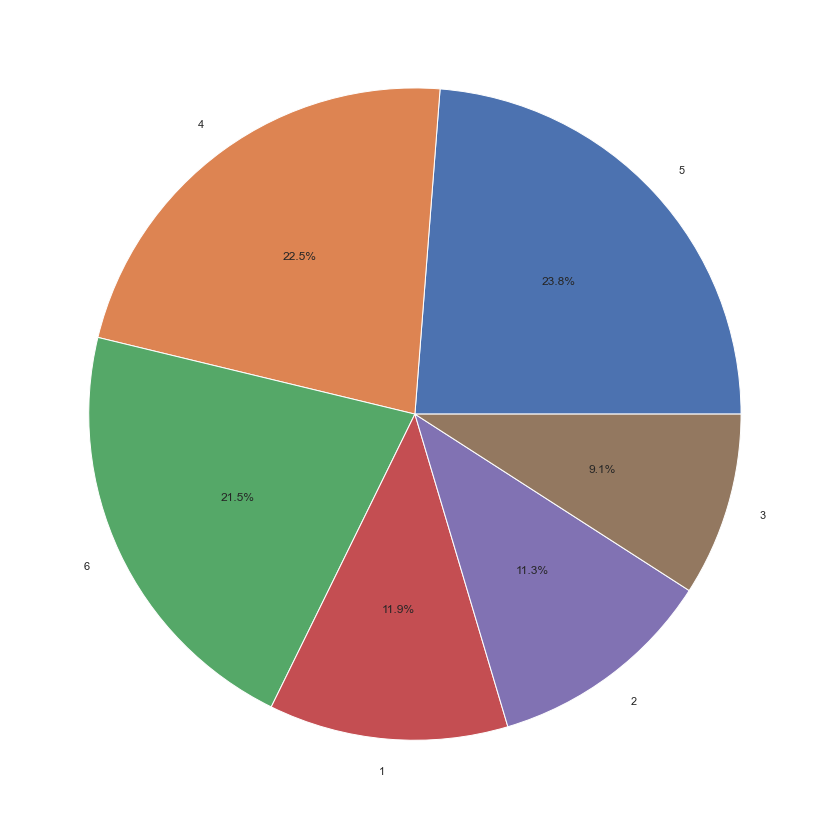

In [43]:
sns.set(rc = {'figure.figsize':(20,15)})
data_chart= pd.DataFrame(data = Data["Tranche YearBuilt"].value_counts()).reset_index() 
data_chart = data_chart.rename(columns = {"Tranche YearBuilt":"Count","index":"Tranche"})
data_chart = data_chart.set_index("Tranche")
plt.pie(x = "Count", data= data_chart ,autopct="%.1f%%", labels = data_chart .index )


On a 45% des batiments fabriqués après 1960.

Graphique des distributions des tranches.

In [44]:
colonnes_to_drop.append("Tranche YearBuilt")

### Builting type 

In [45]:
Data["BuildingType"].value_counts()

NonResidential          4401
Multifamily LR (1-4)    3089
Multifamily MR (5-9)    1754
Multifamily HR (10+)     329
SPS-District K-12        296
Nonresidential COS       220
Campus                    85
Nonresidential WA          3
Name: BuildingType, dtype: int64

On crée une nouvelle variable qui va différencier les batiments destinés aux familles et les batiments non destinés aux familles. Quand il y a "Familly" dans la ligne de la variable, on  dit que la ligne est destinée aux familles.

In [46]:
def Bat_res_or_not(df):
    
    New_Data_Res = []
    build_types = list(df["BuildingType"])

    
    for i in range(len(build_types)) :
        
        by = build_types[i]

        if  "family" in by  : 
            New_Data_Res.append(0)
            
        else :
            New_Data_Res.append(1)  
    
    return New_Data_Res

Text(0.5, 1.0, 'Graphique de type de batiments')

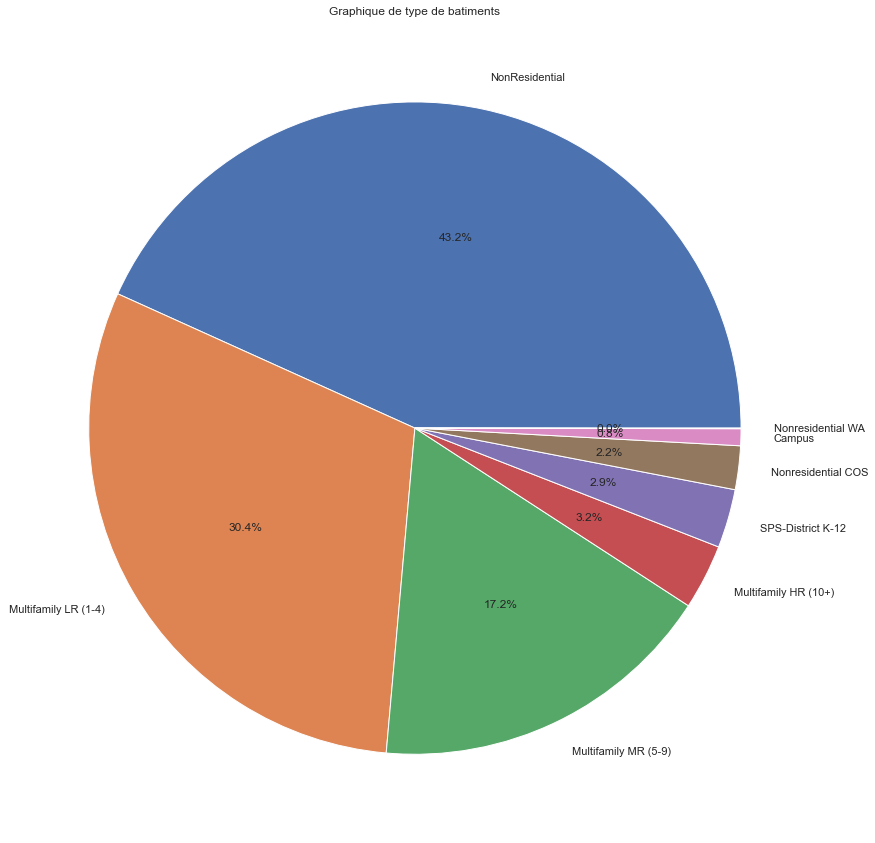

In [47]:
sns.set(rc = {'figure.figsize':(20,15)})
data_chart= pd.DataFrame(data = Data["BuildingType"].value_counts()).reset_index() 
data_chart = data_chart.rename(columns = {"BuildingType":"Count","index":"Type"})
data_chart = data_chart.set_index("Type")
plt.pie(x = "Count", data= data_chart ,autopct="%.1f%%", labels = data_chart .index )
plt.title("Graphique de type de batiments")


On a à peu près la moitié des batiments qui sont destinés aux familles.

In [48]:
Data["Building Residential"] = Bat_res_or_not(Data)

In [49]:
Data["Building Residential"].value_counts()

0    5172
1    5005
Name: Building Residential, dtype: int64

Text(0.5, 1.0, 'Graphique de type de batiments 2')

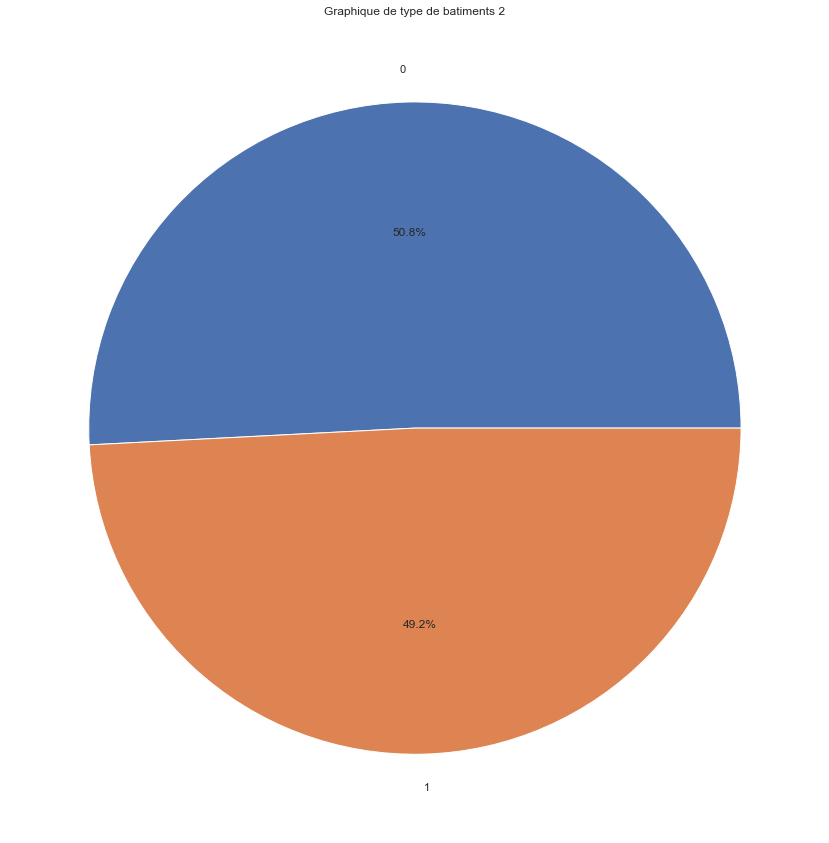

In [50]:
sns.set(rc = {'figure.figsize':(20,15)})
data_chart= pd.DataFrame(data = Data["Building Residential"].value_counts()).reset_index() 
data_chart = data_chart.rename(columns = {"Building Residential":"Count","index":"Type"})
data_chart = data_chart.set_index("Type")
plt.pie(x = "Count", data= data_chart ,autopct="%.1f%%", labels = data_chart .index )
plt.title("Graphique de type de batiments 2")


On filtre les batiments en gardant les batiments non destinés aux familles.

In [51]:
Data = Data[Data["Building Residential"] == 1]

In [52]:
Data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Total energy,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,Tranche YearBuilt,Building Residential
0,1,NonResidential,0.90,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,0.90,88434.0,0.4,NaN,0.40,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,False,Compliant,Ok,249.98,2.830,0,7226362.00,0.546060,0.277302,0.176638,7370.0,0,2,1
1,2,NonResidential,0.90,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",0.90,83880.0,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,False,Compliant,Ok,295.86,2.860,0,8387933.00,0.386609,0.000000,0.613391,9415.0,0,5,1
2,3,NonResidential,0.90,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,Hotel,0.90,756493.0,0.4,NaN,0.40,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,False,Compliant,Ok,2089.28,2.190,0,72587018.00,0.682307,0.297113,0.020579,23320.0,0,4,1
3,5,NonResidential,0.90,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,0.90,61320.0,0.4,NaN,0.40,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,False,Compliant,Ok,286.43,4.670,0,6794583.25,0.407519,0.325913,0.266567,6132.0,0,2,1
4,8,NonResidential,0.90,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",0.90,123445.0,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,False,Compliant,Ok,505.01,2.880,0,14172605.00,0.378802,0.000000,0.621198,9754.0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10160,50194,NonResidential,0.65,Valhalla Building,5304-5310 Ballard Ave NW,Seattle,WA,98107.0,2767703010,6.0,BALLARD,47.66673,-122.38309,2016.0,1.0,4.0,37100,0.0,37100.0,Office,0.65,34350.0,0.4,NaN,0.40,NaN,NaN,36.100000,36.100000,95.400000,95.400000,1.241614e+06,1.241614e+06,NaN,2.766236e+05,9.438397e+05,2977.74000,297774.00,Y,Not Compliant,Ok,19.72,0.532,0,NaN,NaN,NaN,NaN,9275.0,0,6,1
10161,50196,Nonresidential COS,0.40,Northgate Community Center,10510 5th Ave NE,Seattle,WA,98125.0,2926049431,5.0,NORTH,47.70541,-122.32232,2005.0,1.0,1.0,20616,0.0,20616.0,"Fitness Center/Health Club/Gym, Office, Other ...",0.40,9900.0,0.4,8577.0,0.85,1364.0,NaN,36.100000,36.100000,113.400000,113.400000,7.447956e+05,7.447956e+05,NaN,2.182871e+05,7.447956

## Séparation variables

In [53]:
### Variable catégorielles
cat_features = [
                    "BuildingType",
                    "PropertyName",
                    "Address",
                    "City",
                    "State",
                    "Neighborhood",
                    "ListOfAllPropertyUseTypes",
                    "ComplianceStatus"
  
           ]

num_features = [
                "Building Residential",
                "Tranche YearBuilt",
                "YearBuilt",
                'NumberofBuildings',
                'NumberofFloors', 
                'PropertyGFATotal', 
                'PropertyGFAParking',
                'PropertyGFABuilding(s)', 
                'LargestPropertyUseTypeGFA', 
                'ENERGYSTARScore', 
                'SourceEUI(kBtu/sf)', 
                'SourceEUIWN(kBtu/sf)',
                'SteamUse(kBtu)',
                'Electricity(kWh)', 
                'Electricity(kBtu)', 
                'NaturalGas(therms)',
                'NaturalGas(kBtu)',
                "SecondLargestPropertyUseTypeGFA",
                'SiteEnergyUse(kBtu)', 
                'SiteEnergyUseWN(kBtu)',
                "ThirdLargestPropertyUseTypeGFA",
                 "LargestPropertyUseType",
                    "SecondLargestPropertyUseType",
                    "ThirdLargestPropertyUseType",
                "PrimaryPropertyType",
                'Outlier Cat',
                "Electricity(kBtu) %",
                "SteamUse(kBtu) %",
                "NaturalGas(kBtu) %",
                "GFA_by_floor"
    
    
               ]


ID = [  
                'OSEBuildingID',
                'DataYear', 
                'ZipCode',
                'TaxParcelIdentificationNumber', 
                'CouncilDistrictCode',
                'Latitude', 
                'Longitude', 
            
               ]


target = [
            'TotalGHGEmissions',
            'GHGEmissionsIntensity',
            "SiteEUI(kBtu/sf)",
            "SiteEUIWN(kBtu/sf)",
            "SiteEnergyUseWN(kBtu)"
    
            ]

# Transformation des Majuscules en minuscules.

On transforme toutes les majuscules en minuscules pour éviter d'avoir trop de colonnes dans les encoders.

In [54]:
Data[cat_features] = Data[cat_features].apply(lambda x: x.astype(str).str.lower())

In [55]:
Data[cat_features]

,BuildingType,PropertyName,Address,City,State,Neighborhood,ListOfAllPropertyUseTypes,ComplianceStatus
0,nonresidential,mayflower park hotel,405 olive way,seattle,wa,downtown,hotel,compliant
1,nonresidential,paramount hotel,724 pine street,seattle,wa,downtown,"hotel, parking, restaurant",compliant
2,nonresidential,5673-the westin seattle,1900 5th avenue,seattle,wa,downtown,hotel,compliant
3,nonresidential,hotel max,620 stewart st,seattle,wa,downtown,hotel,compliant
4,nonresidential,warwick seattle hotel (id8),401 lenora st,seattle,wa,downtown,"hotel, parking, swimming pool",compliant
...,...,...,...,...,...,...,...,...
10160,nonresidential,valhalla building,5304-5310 ballard ave nw,seattle,wa,ballard,office,not compliant
10161,nonresidential cos,northgate community center,10510 5th ave ne,seattle,wa,north,"fitness center/health club/gym, office, other ...",not compliant
10162,nonresidential cos,conservatory campus,1400 e galer st,seattle,wa,east,other - recreation,compliant
10163,nonresidential cos,garfield community center,2323 east cherry st,seattle,wa,central,"fitness center/health club/gym, office, other ...",not compliant


# Traitement des valeurs abberantes

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer,KNNImputer

Dans cette partie, nous allons traiter les valeurs abberantes.

## Traitement valeurs aberrantes sur les target 

In [57]:
Data[target].describe()

,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu)
count,3353.000000,3353.000000,4980.000000,4971.000000,4.971000e+03
mean,186.761715,1.626441,225.424558,225.252991,4.251103e+07
std,797.953329,2.637150,10735.436930,10585.055427,2.409785e+09
min,-0.800000,-0.020000,0.000000,0.000000,0.000000e+00
25%,18.380000,0.310000,34.375000,35.900000,1.328067e+06
50%,50.070000,0.880000,52.600000,54.400002,2.716745e+06
75%,140.850000,1.896000,83.300001,86.100000,7.221825e+06
max,22813.610000,50.139000,757644.500000,746358.120000,1.699009e+11


In [58]:
Data[target].isna().sum()

TotalGHGEmissions        1652
GHGEmissionsIntensity    1652
SiteEUI(kBtu/sf)           25
SiteEUIWN(kBtu/sf)         34
SiteEnergyUseWN(kBtu)      34
dtype: int64

Il y a beaucoup de valeurs manquantes à traiter. On décide de supprimer ces colonnes.

<AxesSubplot:title={'center':'CO²'}>

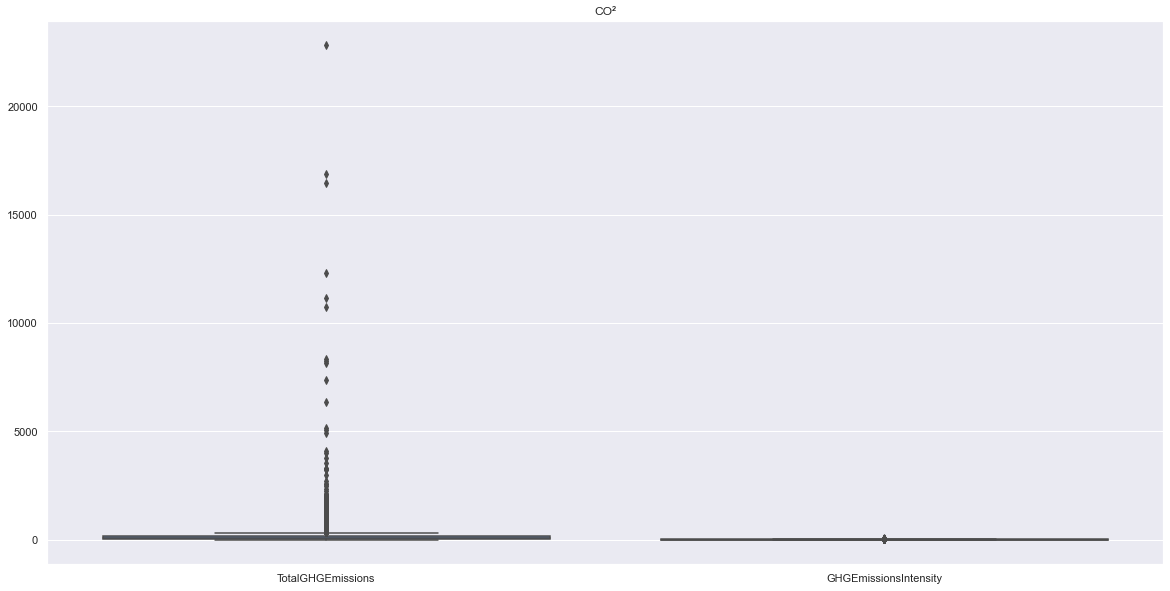

In [59]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.title("CO²")
sns.boxplot(data = Data[['TotalGHGEmissions',
            'GHGEmissionsIntensity'
    ]])

On remarque qu'il y a beaucoup de valeurs  extrêmes qui sortent des intervalles.

<AxesSubplot:title={'center':'Energy'}>

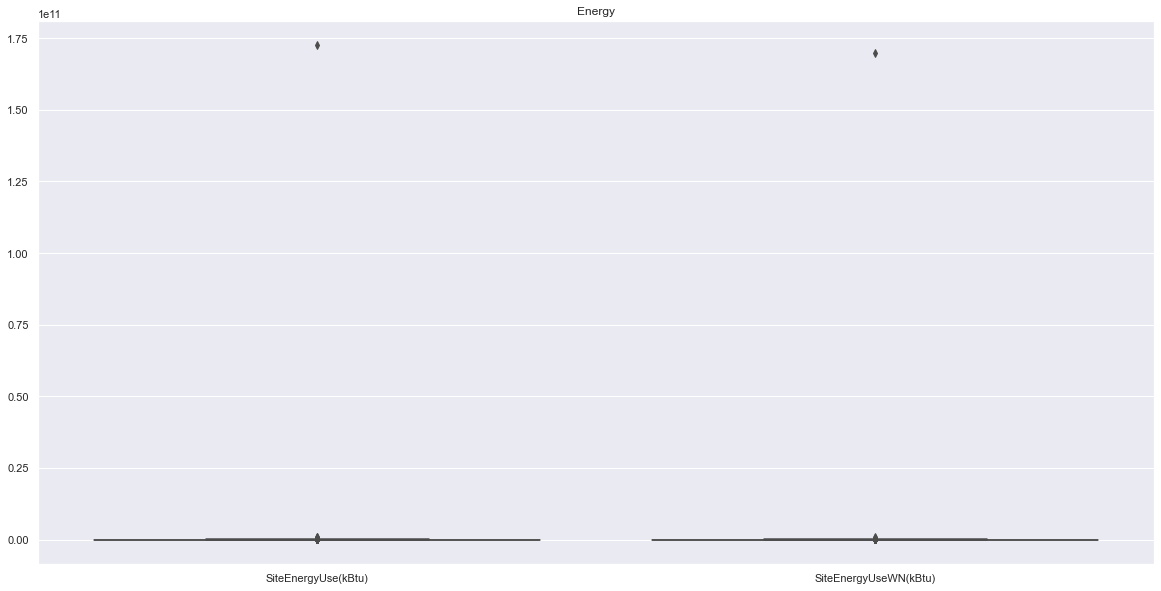

In [60]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.title("Energy")
sns.boxplot(data = Data[['SiteEnergyUse(kBtu)', 
            'SiteEnergyUseWN(kBtu)'
            
    ]])

On note qu'il y a beaucoup de valeurs qui sortent des intervalles. On va donc faire attention aux valeurs abberrantes.

Les valeurs nulles et négatives ne sont pas réalistes dans notre jeu de données. On remplace les valeurs négatives et les valeurs inférieurs ou égales à 0 par des valeurs NAN. Il y a peu de valeurs impliquées par ça donc nos résultats ne seront pas grandement impactés par ces valeurs. 

In [61]:
for col in target :
    ##Data[col].fillna(Data[col].median())
    Data[col] = Data[col].replace(0,np.nan)
    
    t = 0
    compteur = 0
    for row in Data[col] :
        if row < 0  :
            
            Data[col][t] = np.nan
            row = np.nan
            
        t = t +1

C:\Users\cedri\AppData\Local\Temp/ipykernel_2368/3152464832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[col][t] = np.nan


In [62]:
Data[target].describe()

,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu)
count,3332.000000,3330.000000,4961.000000,4933.000000,4.933000e+03
mean,187.938785,1.637675,226.287906,226.988165,4.283850e+07
std,800.326456,2.642765,10755.970017,10625.736434,2.419048e+09
min,-0.800000,-0.020000,0.200000,0.200000,1.144100e+04
25%,18.940000,0.312000,34.500000,36.299999,1.349553e+06
50%,50.615000,0.882500,52.700001,54.700000,2.757933e+06
75%,142.390000,1.901500,83.500000,86.500000,7.329818e+06
max,22813.610000,50.139000,757644.500000,746358.120000,1.699009e+11


array([[<AxesSubplot:title={'center':'TotalGHGEmissions'}>,
        <AxesSubplot:title={'center':'GHGEmissionsIntensity'}>],
       [<AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:>]], dtype=object)

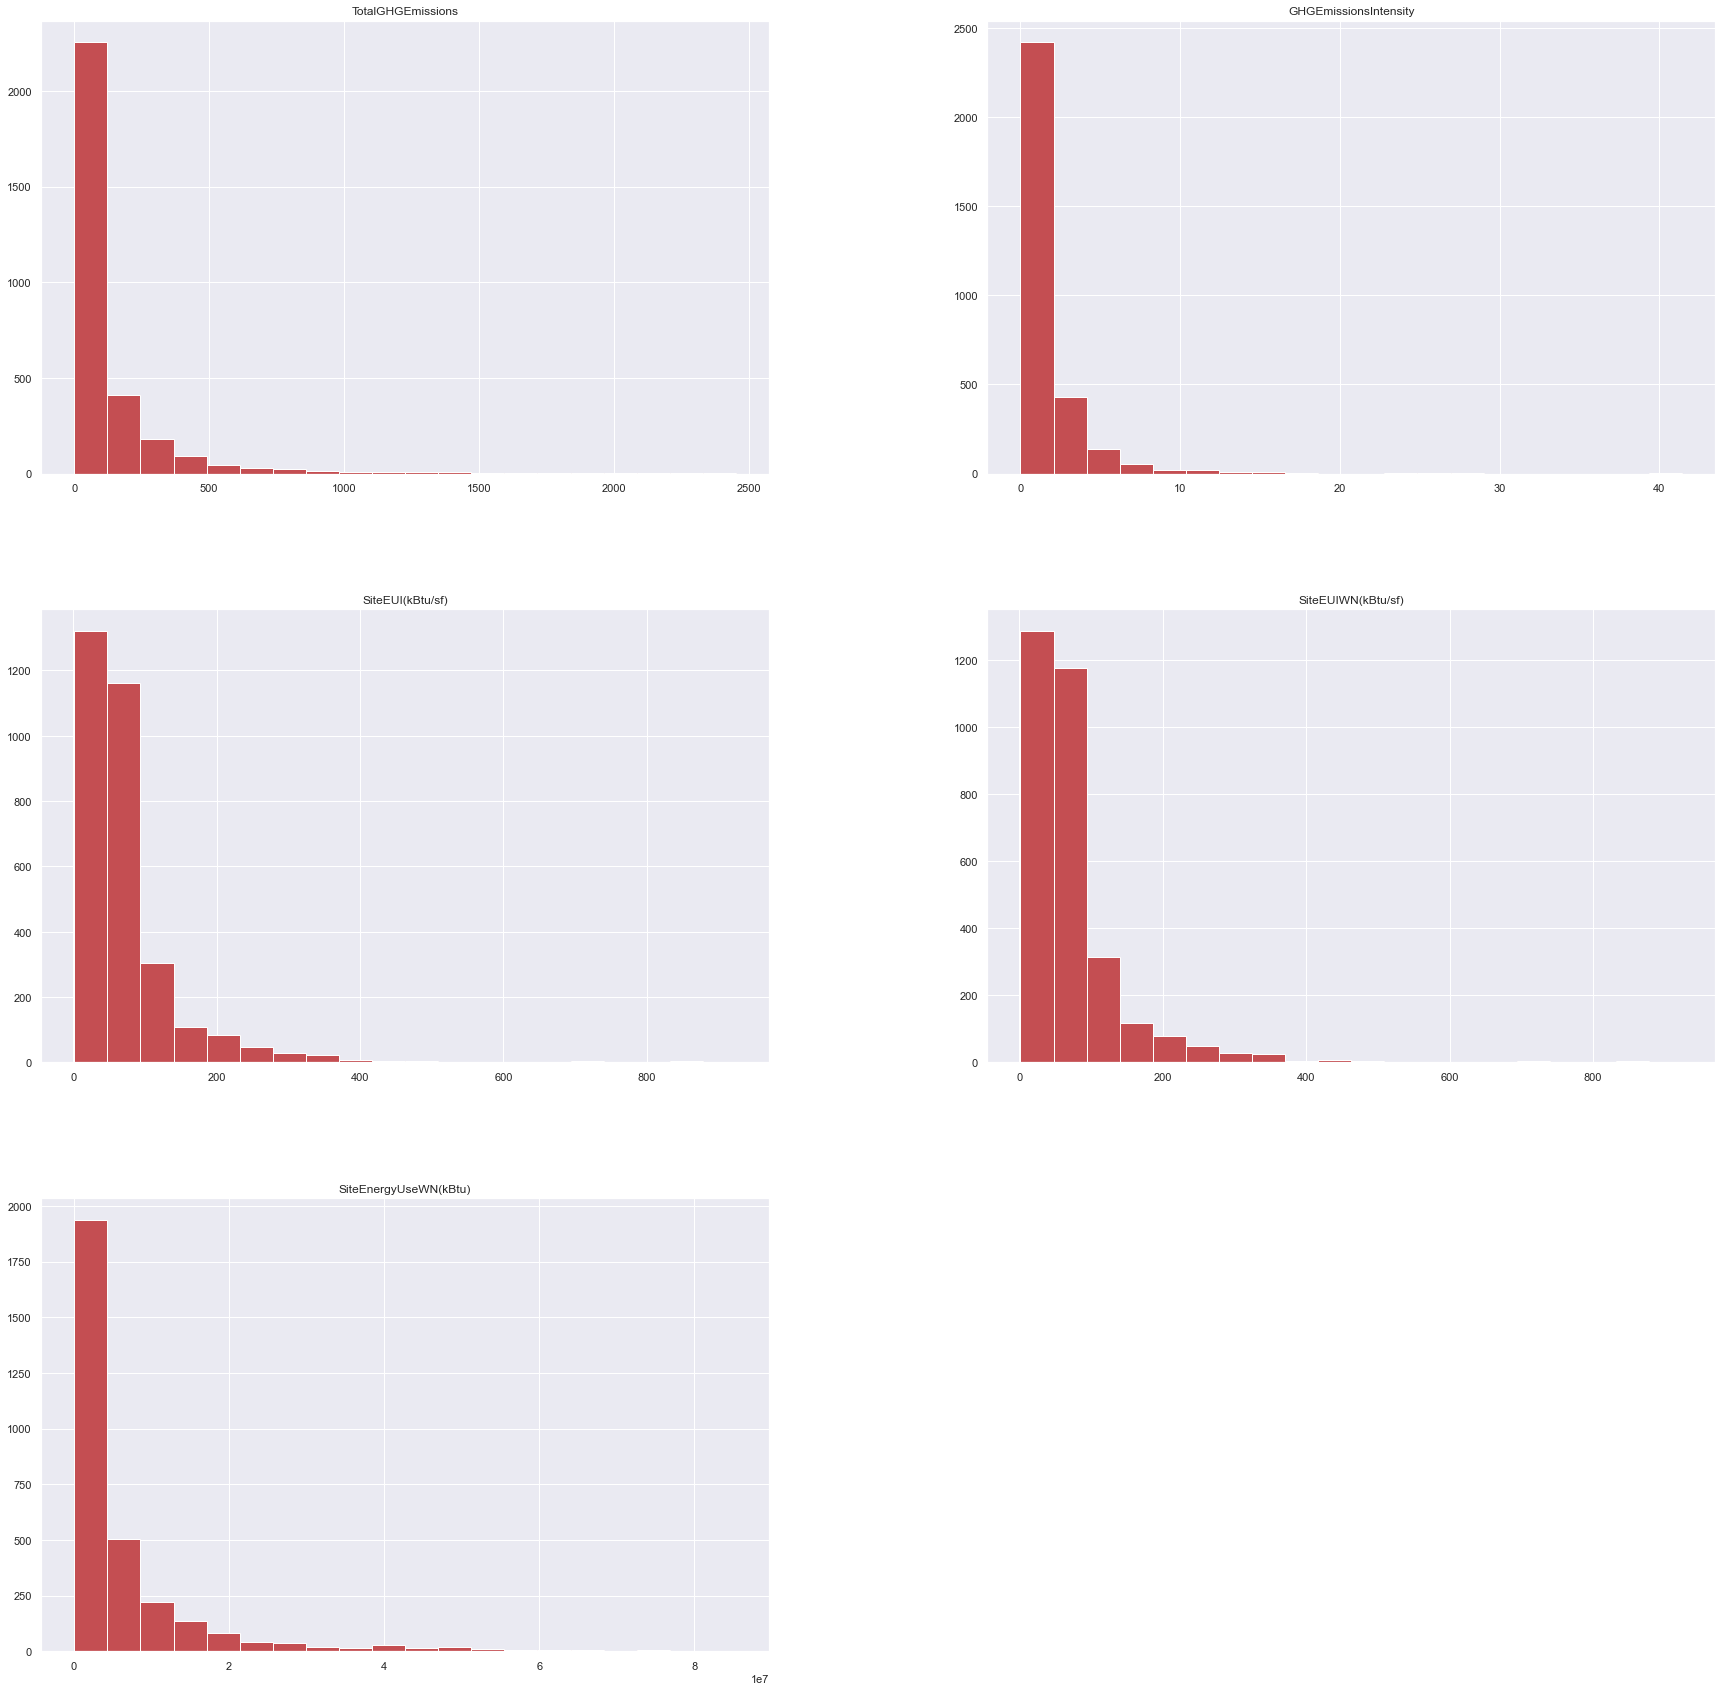

In [155]:
Data[target].hist(bins=20, figsize=(30, 30), color = "r")

On observe des distributions normales (sans les valeurs négatives) pour les variables liées à la consommation. Pour les variables émissions de CO² on a des valeurs pics entre 0 et 0.1 .

# Outlier and compliance

On traite les valeurs abberantes via les variables Outliers et Compliance

In [64]:
Data['Outlier'].unique()

array(['Ok', 'High outlier', 'Low outlier', 'High Outlier', 'Low Outlier'],
      dtype=object)

Les valeurs NAN sont les données qui ne sont pas des outliers. On les remplace par "OK".

In [65]:
Data[['Outlier']] = Data[['Outlier']].fillna("Ok")

In [66]:
Data[['Outlier']].value_counts()

Outlier     
Ok              4943
Low outlier       27
Low Outlier       17
High Outlier      14
High outlier       4
dtype: int64

Il y a seulement 62 outliers dans le jeu de données identifiés via la variable Outliers. Nous allons les écarter du jeu de données.

In [67]:
Data = Data [Data['Outlier'] == 'Ok']

On ecarte les données "Non-Compliant" du jeu de données.

In [68]:
Data['ComplianceStatus'].value_counts()

compliant                       4706
not compliant                    134
error - correct default data      86
missing data                      14
non-compliant                      3
Name: ComplianceStatus, dtype: int64

In [69]:
Data = Data[Data['ComplianceStatus'] !="non compliant"]
Data = Data[Data['ComplianceStatus'] != "not compliant"]

## Traitement Valeurs NA Feature catégorielles

On quantifie les valeurs NA dans les variables catgorielles.

In [70]:
Data_NAN = Data[cat_features].isna().sum()
print(f"Valeurs NAN dans le dataset des features Catégorielles \n\n{Data_NAN}")

Valeurs NAN dans le dataset des features Catégorielles 

BuildingType                 0
PropertyName                 0
Address                      0
City                         0
State                        0
Neighborhood                 0
ListOfAllPropertyUseTypes    0
ComplianceStatus             0
dtype: int64


In [71]:
Data["ListOfAllPropertyUseTypes"] = Data["ListOfAllPropertyUseTypes"].fillna("other")
Data["LargestPropertyUseType"] = Data["LargestPropertyUseType"].fillna("other")

## Traitement Valeurs NA Feature Numérique

A présent on cherche à traiter le valeurs abberantes dans les features numériques.

In [72]:
Data[num_features].describe()

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
count,4809.0,4809.000000,4808.000000,4798.000000,4794.000000,4.809000e+03,4744.000000,4.744000e+03,4.729000e+03,3225.000000,4793.000000,4784.000000,3.383000e+03,4.793000e+03,4.793000e+03,4.371000e+03,4.371000e+03,2403.000000,4.793000e+03,4.747000e+03,959.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.0,3319.000000,3319.000000,3319.000000,4.794000e+03
mean,1.0,3.687461,1962.251040,1.142143,4.201919,1.194850e+05,14811.607293,1.047061e+05,9.870411e+04,65.195659,177.641999,179.349289,8.639616e+05,1.703613e+06,5.812801e+06,2.212011e+04,2.212011e+06,37542.114564,8.515607e+06,8.480922e+06,14957.839832,0.573342,0.450686,0.426856,0.556873,0.0,0.698274,0.027125,0.274601,4.002921e+04
std,0.0,1.623792,32.624727,2.559081,6.544756,2.723812e+05,47494.188499,2.549348e+05,2.482586e+05,28.219537,185.312699,185.063752,7.816933e+06,5.554105e+06,1.895073e+07,1.003731e+05,1.003731e+07,70036.911711,2.924700e+07,2.669039e+07,35388.882157,0.142467,0.099982,0.080464,0.146319,0.0,0.261635,0.103098,0.262460,1.983530e+05
min,1.0,1.000000,1900.000000,0.000000,1.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,1.000000,0.000000,-2.100000,0.000000e+00,-3.672730e+04,-1.253136e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.144100e+04,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,0.000000,0.000000,0.000000,2.220000e+02
25%,1.0,2.000000,1930.000000,1.000000,1.000000,2.987400e+04,0.000000,2.860000e+04,2.585900e+04,48.000000,78.600000,81.674998,0.000000e+00,2.193477e+05,7.484144e+05,6.937750e+02,6.938900e+04,5693.500000,1.280134e+06,1.366594e+06,2806.500000,0.400000,0.400000,0.400000,0.400000,0.0,0.491832,0.000000,0.000000,1.330900e+04
50%,1.0,4.000000,1966.000000,1.000000,2.000000,5.000800e+04,0.000000,4.802000e+04,4.430000e+04,73.000000,132.800000,134.550000,0.000000e+00,5.010580e+05,1.709681e+06,6.232000e+03,6.231840e+05,12697.000000,2.658826e+06,2.787972e+06,6015.000000,0.550000,0.400000,0.400000,0.550000,0.0,0.698295,0.000000,0.232179,2.298000e+04
75%,1.0,5.000000,1989.000000,1.000000,4.000000,1.087530e+05,0.000000,9.626550e+04,9.302000e+04,89.000000,206.600000,207.725000,0.000000e+00,1.485805e+06,5.069777e+06,1.831763e+04,1.831762e+06,32840.000000,7.196194e+06,7.366782e+06,12990.000000,0.650000,0.400000,0.400000,0.650000,0.0,0.998993,0.000000,0.484831,3.815100e+04
max,1.0,6.000000,2016.000000,111.000000,99.000000,9.320156e+06,686750.000000,9.320156e+06,9.320156e+06,100.000000,2902.500000,2902.500000,2.579914e+08,1.960263e+08,6.688416e+08,4.169035e+06,4.169035e+08,686750.000000,1.059039e+09,1.055418e+09,459748.000000,0.900000,0.900000,0.900000,0.900000,0.0,1.000000,0.834527,1.000000,9.320156e+06


array([[<AxesSubplot:title={'center':'Building Residential'}>,
        <AxesSubplot:title={'center':'Tranche YearBuilt'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofBuildings'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>],
       [<AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'LargestPropertyUseTypeGFA'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>],
       [<AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SteamUse(kBtu)'}>,
        <AxesSubplot:title={'center':'Electricity(kWh)'}>,
        <AxesSubplot:title={'center':'Electricity(kBtu)'}>],
       [<AxesSubplot:title={'center':'NaturalGas(therms)'}>,
        <AxesSubplot:title={'cent

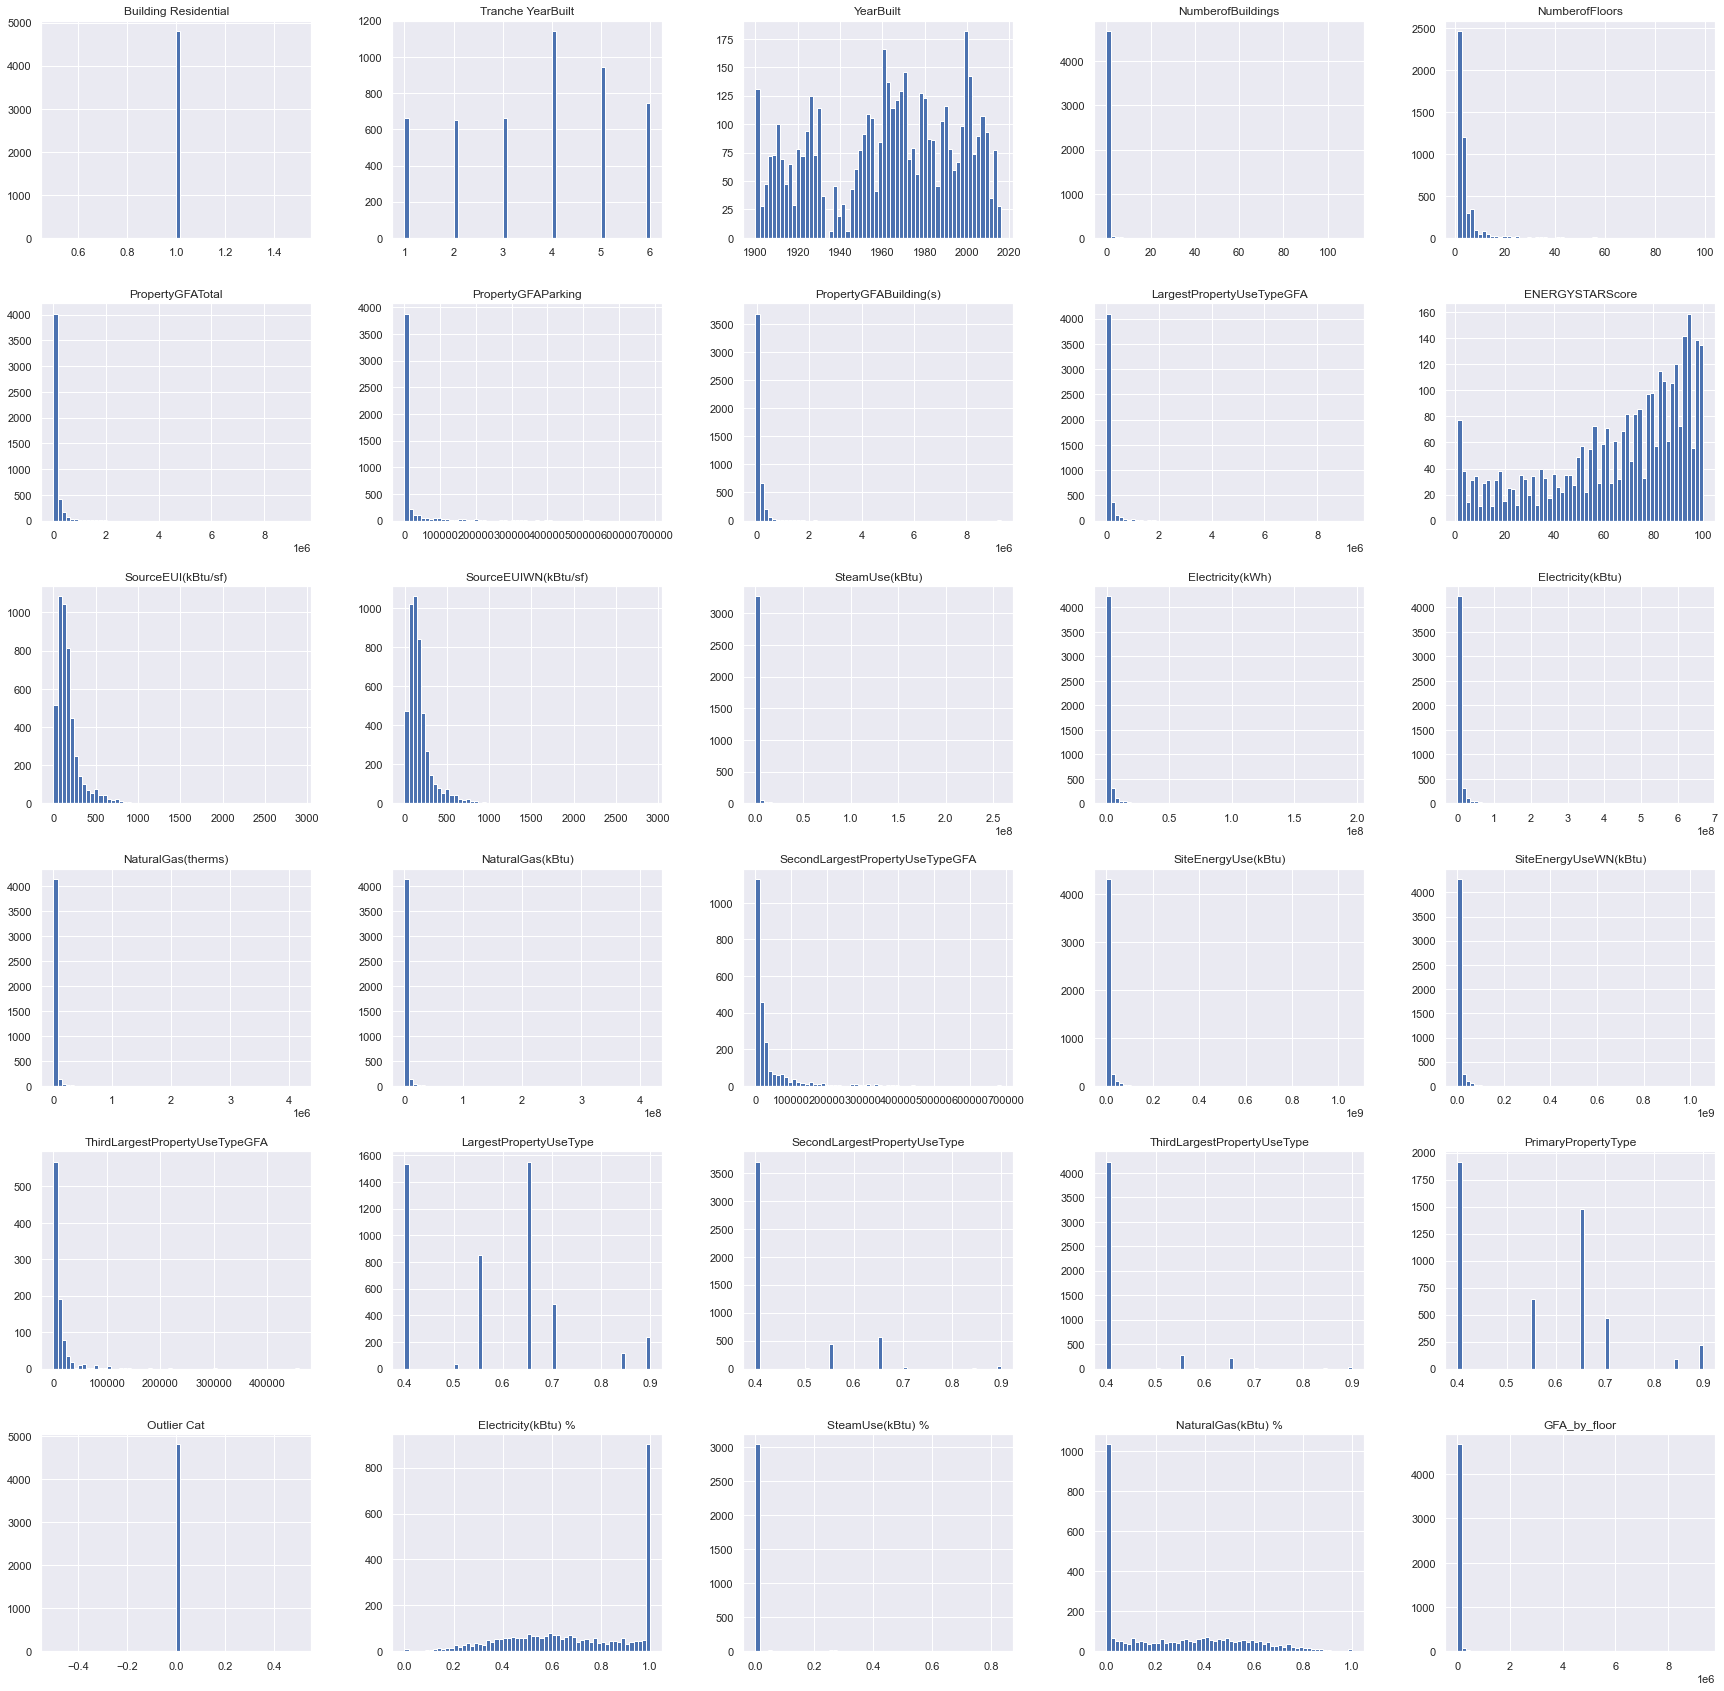

In [73]:
Data[num_features].hist(bins=60, figsize=(30, 30), color = "b")

In [74]:
Data[num_features]

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
0,1,2,1927.0,1.0,12.0,88434,0.0,88434.0,88434.000000,60.0,182.500000,189.000000,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,NaN,7226362.50,7456910.00,NaN,0.90,0.4,0.40,0.90,0,0.546060,0.277302,0.176638,7370.0
1,1,5,1996.0,1.0,11.0,103566,15064.0,88502.0,83880.000000,61.0,176.100006,179.399994,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,15064.0,8387933.00,8664479.00,4622.0,0.90,0.4,0.55,0.90,0,0.386609,0.000000,0.613391,9415.0
2,1,4,1969.0,1.0,41.0,956110,196718.0,759392.0,756493.000000,43.0,241.899994,244.100006,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,NaN,72587024.00,73937112.00,NaN,0.90,0.4,0.40,0.90,0,0.682307,0.297113,0.020579,23320.0
3,1,2,1926.0,1.0,10.0,61320,0.0,61320.0,61320.000000,56.0,216.199997,224.000000,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,NaN,6794584.00,6946800.50,NaN,0.90,0.4,0.40,0.90,0,0.407519,0.325913,0.266567,6132.0
4,1,5,1980.0,1.0,18.0,175580,62000.0,113580.0,123445.000000,75.0,211.399994,215.600006,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,68009.0,14172606.00,14656503.00,0.0,0.90,0.4,0.40,0.90,0,0.378802,0.000000,0.621198,9754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,1,6,2016.0,1.0,2.0,44745,0.0,44745.0,44667.000000,76.0,130.800000,130.800000,NaN,5.451625e+05,1.860094e+06,NaN,NaN,0.0,1860094.75,1860094.75,NaN,0.40,0.4,0.40,0.65,0,NaN,NaN,NaN,22372.0
10154,1,6,2016.0,1.0,8.0,213803,24987.0,188816.0,217888.000000,99.0,88.900000,88.900000,NaN,1.808092e+06,6.169208e+06,NaN,NaN,NaN,6169209.00,6169209.00,NaN,0.65,0.4,0.40,0.65,0,NaN,NaN,NaN,26725.0
10156,1,6,2016.0,1.0,4.0,95576,24184.0,71392.0,40074.898438,93.0,132.600000,130.200000,NaN,8.715415e+05,2.973700e+06,NaN,NaN,24853.0,2973700.00,2919674.00,24184.0,0.65,0.7,0.40,0.40,0,NaN,NaN,NaN,23894.0
10162,1,1,1912.0,5.0,1.0,23445,0.0,23445.0,23445.000000,NaN,461.600000,457.200000,NaN,4.838737e+05,1.650977e+06,53695.99000,5369599.22,NaN,7020576.50,6923334.50,NaN,0.40,0.4,0.40,0.40,0,NaN,NaN,NaN,23445.0


On quantifie les valeurs NAN.

In [75]:
Data[num_features].isna().sum()

Building Residential                  0
Tranche YearBuilt                     0
YearBuilt                             1
NumberofBuildings                    11
NumberofFloors                       15
PropertyGFATotal                      0
PropertyGFAParking                   65
PropertyGFABuilding(s)               65
LargestPropertyUseTypeGFA            80
ENERGYSTARScore                    1584
SourceEUI(kBtu/sf)                   16
SourceEUIWN(kBtu/sf)                 25
SteamUse(kBtu)                     1426
Electricity(kWh)                     16
Electricity(kBtu)                    16
NaturalGas(therms)                  438
NaturalGas(kBtu)                    438
SecondLargestPropertyUseTypeGFA    2406
SiteEnergyUse(kBtu)                  16
SiteEnergyUseWN(kBtu)                62
ThirdLargestPropertyUseTypeGFA     3850
LargestPropertyUseType                0
SecondLargestPropertyUseType          0
ThirdLargestPropertyUseType           0
PrimaryPropertyType                   0


<AxesSubplot:title={'center':'Boxplot'}>

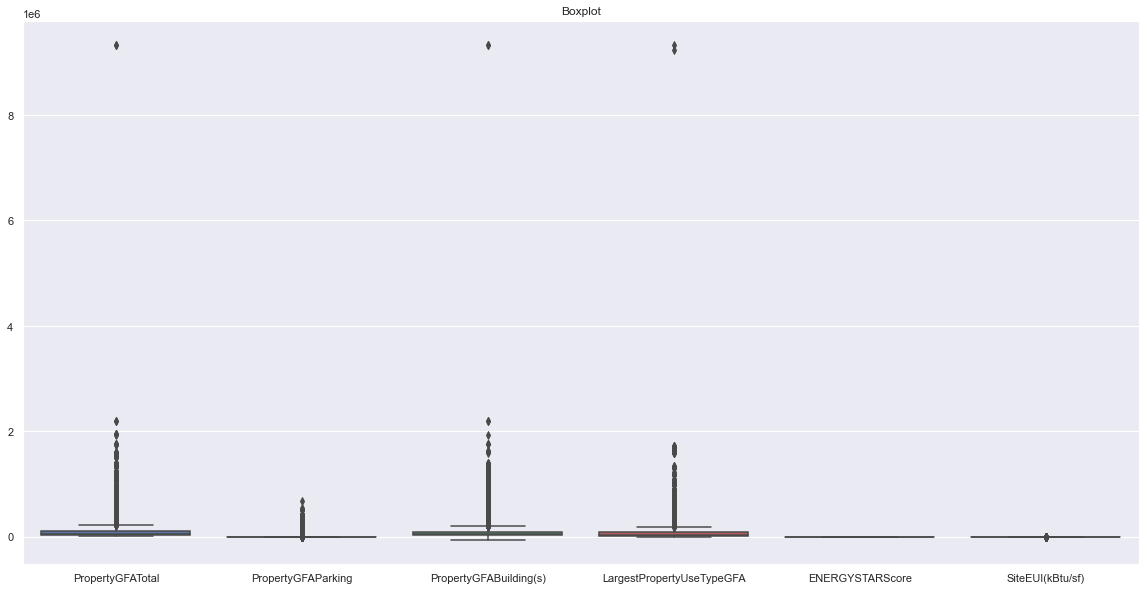

In [76]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.title("Boxplot")
sns.boxplot(data =Data[[
                        'PropertyGFATotal', 
                        'PropertyGFAParking',
                        'PropertyGFABuilding(s)', 
                        'LargestPropertyUseTypeGFA', 
                        'ENERGYSTARScore', 
                        'SiteEUI(kBtu/sf)']])

# Valeurs négatives

On traite les valeurs négatives.

In [77]:
Data[num_features ].describe()

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
count,4809.0,4809.000000,4808.000000,4798.000000,4794.000000,4.809000e+03,4744.000000,4.744000e+03,4.729000e+03,3225.000000,4793.000000,4784.000000,3.383000e+03,4.793000e+03,4.793000e+03,4.371000e+03,4.371000e+03,2403.000000,4.793000e+03,4.747000e+03,959.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.0,3319.000000,3319.000000,3319.000000,4.794000e+03
mean,1.0,3.687461,1962.251040,1.142143,4.201919,1.194850e+05,14811.607293,1.047061e+05,9.870411e+04,65.195659,177.641999,179.349289,8.639616e+05,1.703613e+06,5.812801e+06,2.212011e+04,2.212011e+06,37542.114564,8.515607e+06,8.480922e+06,14957.839832,0.573342,0.450686,0.426856,0.556873,0.0,0.698274,0.027125,0.274601,4.002921e+04
std,0.0,1.623792,32.624727,2.559081,6.544756,2.723812e+05,47494.188499,2.549348e+05,2.482586e+05,28.219537,185.312699,185.063752,7.816933e+06,5.554105e+06,1.895073e+07,1.003731e+05,1.003731e+07,70036.911711,2.924700e+07,2.669039e+07,35388.882157,0.142467,0.099982,0.080464,0.146319,0.0,0.261635,0.103098,0.262460,1.983530e+05
min,1.0,1.000000,1900.000000,0.000000,1.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,1.000000,0.000000,-2.100000,0.000000e+00,-3.672730e+04,-1.253136e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.144100e+04,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,0.000000,0.000000,0.000000,2.220000e+02
25%,1.0,2.000000,1930.000000,1.000000,1.000000,2.987400e+04,0.000000,2.860000e+04,2.585900e+04,48.000000,78.600000,81.674998,0.000000e+00,2.193477e+05,7.484144e+05,6.937750e+02,6.938900e+04,5693.500000,1.280134e+06,1.366594e+06,2806.500000,0.400000,0.400000,0.400000,0.400000,0.0,0.491832,0.000000,0.000000,1.330900e+04
50%,1.0,4.000000,1966.000000,1.000000,2.000000,5.000800e+04,0.000000,4.802000e+04,4.430000e+04,73.000000,132.800000,134.550000,0.000000e+00,5.010580e+05,1.709681e+06,6.232000e+03,6.231840e+05,12697.000000,2.658826e+06,2.787972e+06,6015.000000,0.550000,0.400000,0.400000,0.550000,0.0,0.698295,0.000000,0.232179,2.298000e+04
75%,1.0,5.000000,1989.000000,1.000000,4.000000,1.087530e+05,0.000000,9.626550e+04,9.302000e+04,89.000000,206.600000,207.725000,0.000000e+00,1.485805e+06,5.069777e+06,1.831763e+04,1.831762e+06,32840.000000,7.196194e+06,7.366782e+06,12990.000000,0.650000,0.400000,0.400000,0.650000,0.0,0.998993,0.000000,0.484831,3.815100e+04
max,1.0,6.000000,2016.000000,111.000000,99.000000,9.320156e+06,686750.000000,9.320156e+06,9.320156e+06,100.000000,2902.500000,2902.500000,2.579914e+08,1.960263e+08,6.688416e+08,4.169035e+06,4.169035e+08,686750.000000,1.059039e+09,1.055418e+09,459748.000000,0.900000,0.900000,0.900000,0.900000,0.0,1.000000,0.834527,1.000000,9.320156e+06


Trois features avec des valeurs négatives. 

In [78]:
Compteur_neg = 0
for col in ["SourceEUIWN(kBtu/sf)","Electricity(kWh)","Electricity(kBtu)"] :
    Compteur_neg = Compteur_neg + Data[Data[col]<0].shape[0]
    Data = Data[Data[col]>0]

In [79]:
print(f" Il y a {Compteur_neg} avec des nombres négatifs")

 Il y a 2 avec des nombres négatifs


On retire la ligne avec des valeurs négatives.

# Energy outliers

On cherche à identifier les features qui ont des sommes de dépense énergétiques supérieur à leur dépense énergétique totale.

In [80]:
Outliers = Data[ Data["Total energy"] > Data["SiteEnergyUse(kBtu)"]]

In [81]:
Data["coeff_energy"]  = Data["SiteEnergyUse(kBtu)"]/Data["SiteEnergyUseWN(kBtu)"]
colonnes_to_drop.append("coeff_energy")

In [82]:
def func_transform_energy(df):
    new_energy = []
    old_energy = list(df["SiteEnergyUse(kBtu)"])
    recalcul_energy = list(df["Total energy"])
    
    for i in range(len(old_energy)) :
        
        oe = old_energy[i]
        re = recalcul_energy[i]
        
        if re < oe : 
            new_energy.append(oe)
        else : 
            new_energy.append(re)
    
    return new_energy

In [83]:
Data["SiteEnergyUse(kBtu) recalcule"] = func_transform_energy(Data)

In [84]:
Data["SiteEnergyUseWN(kBtu) recalcule"] = Data["SiteEnergyUse(kBtu)"] * Data["coeff_energy"]

In [85]:
Data[["SiteEnergyUseWN(kBtu)","SiteEnergyUse(kBtu)"]]

,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu)
0,7456910.00,7226362.50
1,8664479.00,8387933.00
2,73937112.00,72587024.00
3,6946800.50,6794584.00
4,14656503.00,14172606.00
...,...,...
10139,1860094.75,1860094.75
10154,6169209.00,6169209.00
10156,2919674.00,2973700.00
10162,6923334.50,7020576.50


In [86]:
Ouliers_Energy = len(Data[ Data["Total energy"] >  Data["SiteEnergyUse(kBtu)"]])

In [87]:
print(f' Il y a  {Ouliers_Energy} outliers liée à la variable Energy')

 Il y a  1917 outliers liée à la variable Energy


Il y a énormément de outliers liée à l'énergie dans le jeux de données. Cela représente un nombre trop important. On décide de les garder car si on les enlève nous allons perdre trop de données. On veut éviter une problèmatique de sous apprentissage. Les modèles les plus robustes devraient bien traiter ces valeurs.

In [88]:
##Data = Data[ Data["Total energy"] <=  Data["SiteEnergyUse(kBtu)"]]

In [89]:
Data[num_features]

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
0,1,2,1927.0,1.0,12.0,88434,0.0,88434.0,88434.000000,60.0,182.500000,189.000000,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,NaN,7226362.50,7456910.00,NaN,0.90,0.4,0.40,0.90,0,0.546060,0.277302,0.176638,7370.0
1,1,5,1996.0,1.0,11.0,103566,15064.0,88502.0,83880.000000,61.0,176.100006,179.399994,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,15064.0,8387933.00,8664479.00,4622.0,0.90,0.4,0.55,0.90,0,0.386609,0.000000,0.613391,9415.0
2,1,4,1969.0,1.0,41.0,956110,196718.0,759392.0,756493.000000,43.0,241.899994,244.100006,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,NaN,72587024.00,73937112.00,NaN,0.90,0.4,0.40,0.90,0,0.682307,0.297113,0.020579,23320.0
3,1,2,1926.0,1.0,10.0,61320,0.0,61320.0,61320.000000,56.0,216.199997,224.000000,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,NaN,6794584.00,6946800.50,NaN,0.90,0.4,0.40,0.90,0,0.407519,0.325913,0.266567,6132.0
4,1,5,1980.0,1.0,18.0,175580,62000.0,113580.0,123445.000000,75.0,211.399994,215.600006,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,68009.0,14172606.00,14656503.00,0.0,0.90,0.4,0.40,0.90,0,0.378802,0.000000,0.621198,9754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,1,6,2016.0,1.0,2.0,44745,0.0,44745.0,44667.000000,76.0,130.800000,130.800000,NaN,5.451625e+05,1.860094e+06,NaN,NaN,0.0,1860094.75,1860094.75,NaN,0.40,0.4,0.40,0.65,0,NaN,NaN,NaN,22372.0
10154,1,6,2016.0,1.0,8.0,213803,24987.0,188816.0,217888.000000,99.0,88.900000,88.900000,NaN,1.808092e+06,6.169208e+06,NaN,NaN,NaN,6169209.00,6169209.00,NaN,0.65,0.4,0.40,0.65,0,NaN,NaN,NaN,26725.0
10156,1,6,2016.0,1.0,4.0,95576,24184.0,71392.0,40074.898438,93.0,132.600000,130.200000,NaN,8.715415e+05,2.973700e+06,NaN,NaN,24853.0,2973700.00,2919674.00,24184.0,0.65,0.7,0.40,0.40,0,NaN,NaN,NaN,23894.0
10162,1,1,1912.0,5.0,1.0,23445,0.0,23445.0,23445.000000,NaN,461.600000,457.200000,NaN,4.838737e+05,1.650977e+06,53695.99000,5369599.22,NaN,7020576.50,6923334.50,NaN,0.40,0.4,0.40,0.40,0,NaN,NaN,NaN,23445.0


## Target Outliers

array([[<AxesSubplot:title={'center':'TotalGHGEmissions'}>,
        <AxesSubplot:title={'center':'GHGEmissionsIntensity'}>],
       [<AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:>]], dtype=object)

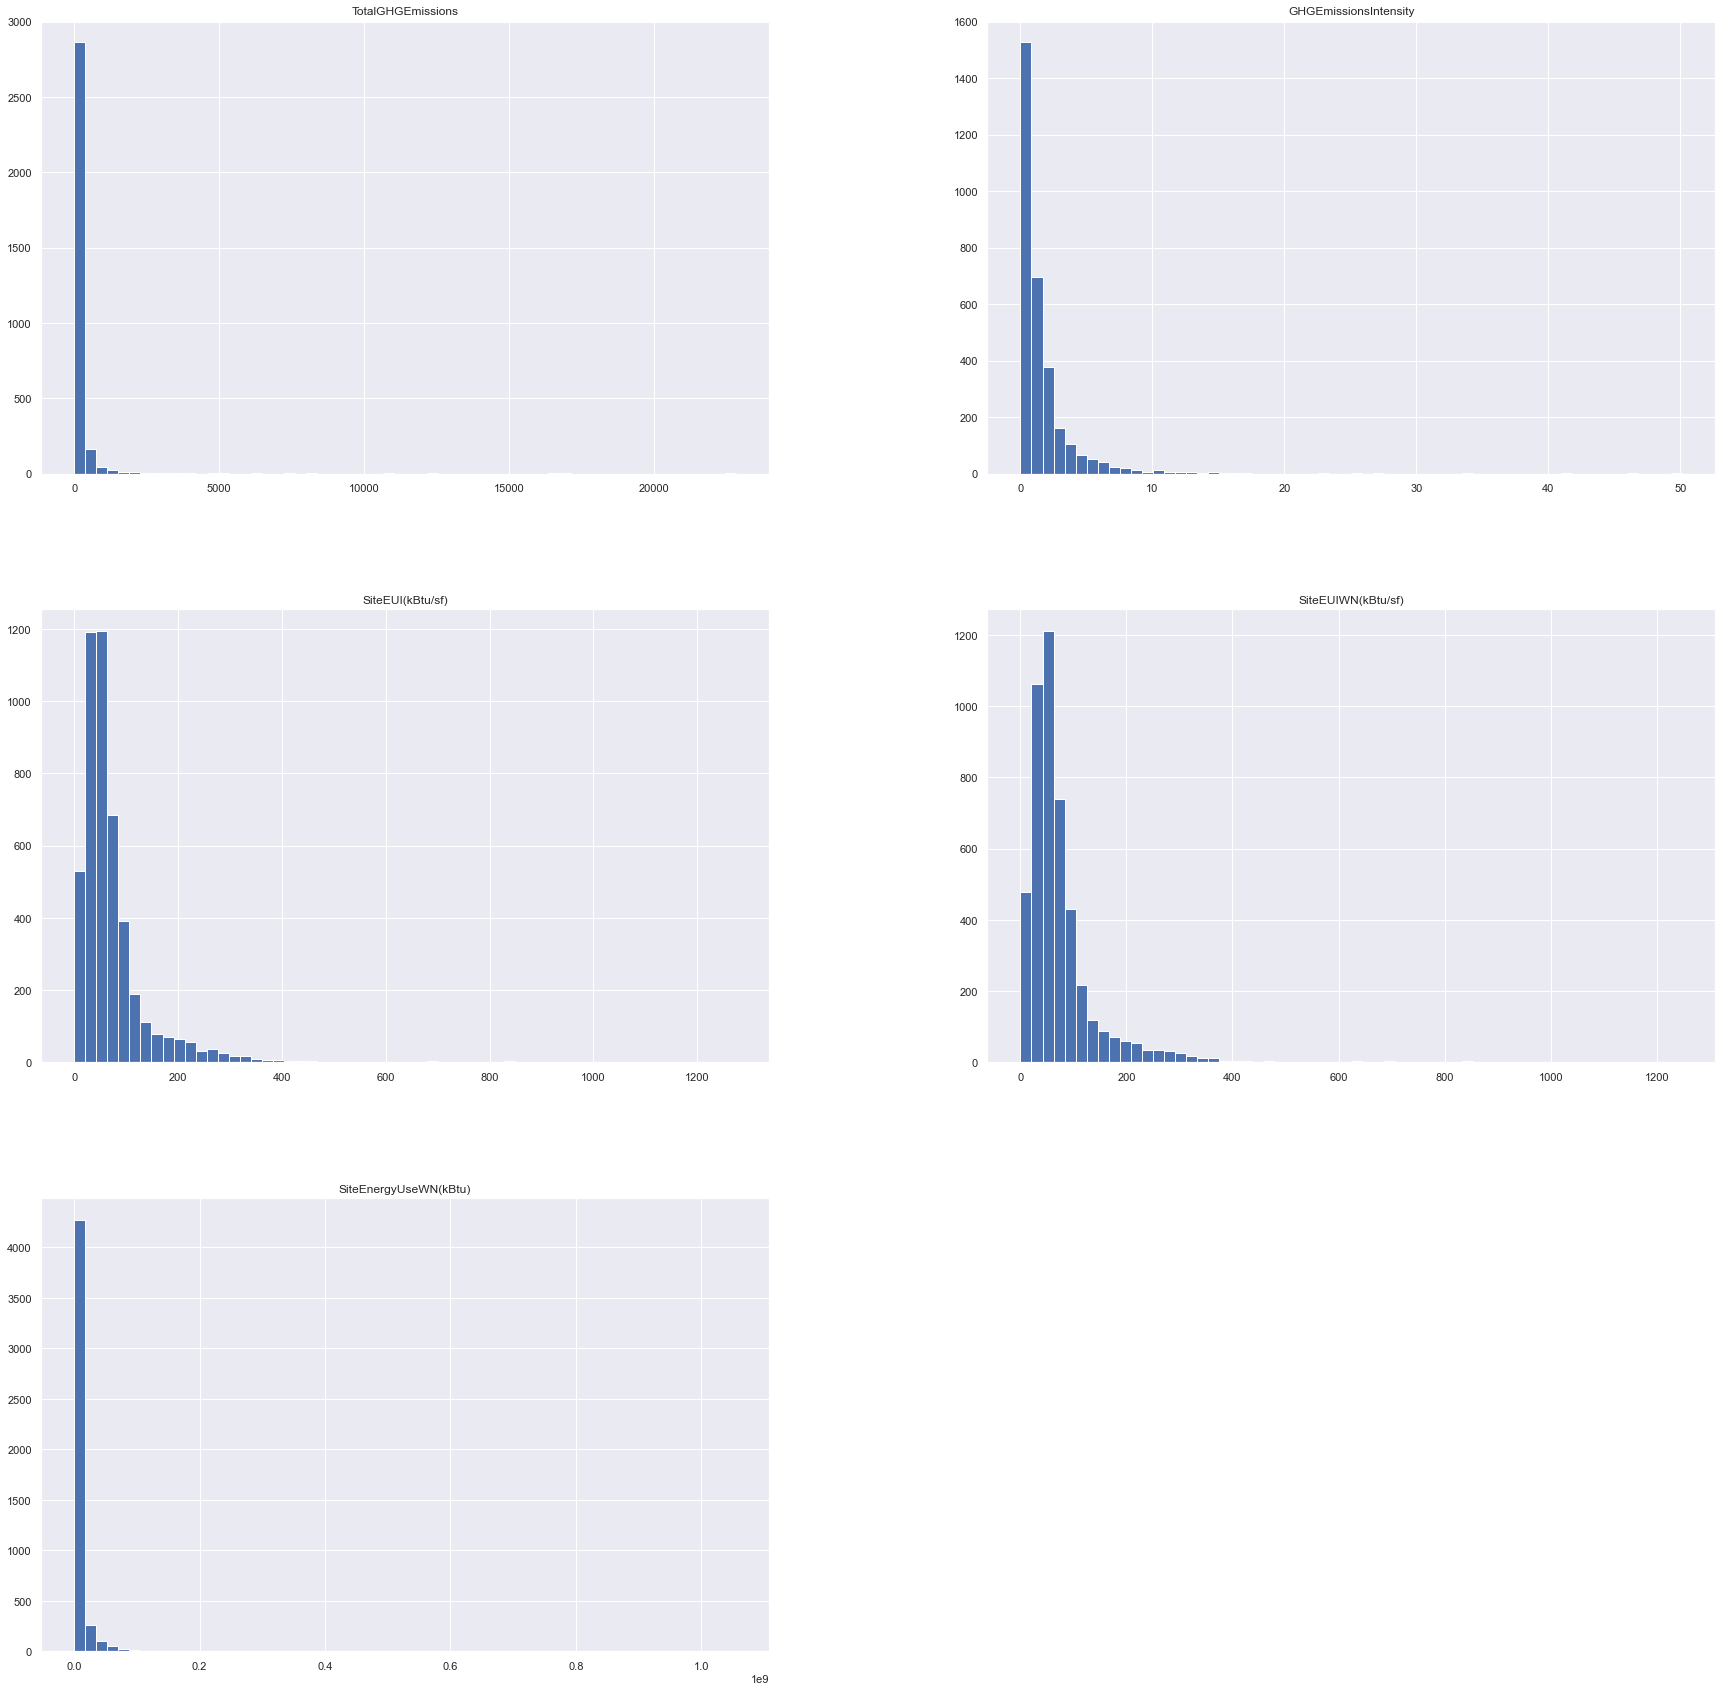

In [90]:
Data[target].hist(bins=60, figsize=(30, 30), color = "b")

In [91]:
Data[target].describe()

,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu)
count,3139.000000,3139.000000,4742.000000,4742.000000,4.742000e+03
mean,186.233594,1.637681,73.464403,75.617672,8.483446e+06
std,792.114756,2.640946,75.916103,76.573882,2.670377e+07
min,0.230000,0.006000,0.200000,0.200000,1.144100e+04
25%,19.650000,0.320000,34.700000,36.700000,1.367887e+06
50%,50.860000,0.880000,52.850000,54.700001,2.787311e+06
75%,142.390000,1.910000,83.275000,86.199999,7.361230e+06
max,22813.610000,50.139000,1274.500000,1247.900000,1.055418e+09


On note qu'il y a des émissions de C0² nettement supérieur à la borne des 75%. Par exemple la valeur de Total GHG Emissions est equivalente à 90 fois la valeurs de la borne supérieur 75%. Ce qui est aussi le cas pour la consommation d'énergie. Ces grosses émissions concerne surtout les très gros batiments qui ne sont pas représentatifs de la majorité. 

On souhaite quantifier puis enlèver les batiments avec des consommation d'énergie et des émissiosn de C0² très élevés. Car ces valeurs vont impacter nos modèles linéaires.

In [92]:
Nrj_Outliers = Data[ Data["SiteEnergyUseWN(kBtu)"] > 100000000 ]
print(f' Il y a  {Nrj_Outliers.shape[0]} outliers liée avec un très grosse consmmation énergie')

 Il y a  29 outliers liée avec un très grosse consmmation énergie


In [93]:
C02_Outliers = Data[ Data["TotalGHGEmissions"] > 2500 ]
print(f' Il y a  {C02_Outliers.shape[0]} outliers liée avec un très grosse consmmation énergie')

 Il y a  26 outliers liée avec un très grosse consmmation énergie


In [94]:
Data = Data[ Data["SiteEnergyUseWN(kBtu)"] < 100000000 ]
Data = Data[ Data["TotalGHGEmissions"] < 2500 ]

In [95]:
Data.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   8
Neighborhood                          0
Latitude                              8
Longitude                             8
YearBuilt                             1
NumberofBuildings                     0
NumberofFloors                        7
PropertyGFATotal                      0
PropertyGFAParking                   64
PropertyGFABuilding(s)               64
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA    1535
ThirdLargestPropertyUseType           0


On retire ces valeurs Outliers du DataSet.

## Floors outliers

On identifie les immeubles outliers. A seattle l'immeuble le plus grand fait 76 étages. On supprime les immeubles supérieurs à 76.

In [96]:
len(Data[Data["NumberofFloors"] > 76.0])

1

In [97]:
print("Le nombre de outliers est", Data[Data["NumberofFloors"] > 76].shape[0], "liée au nombre d'étages")

Le nombre de outliers est 1 liée au nombre d'étages


In [98]:
Data = Data[Data["NumberofFloors"] < 76]
##Columbia Center a setattle 76 etages

# Surface Outliers

On identifie s'il y a des surfaces totales plus petites que la somme des surfaces.

In [99]:
Data[num_features]

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
0,1,2,1927.0,1.0,12.0,88434,0.0,88434.0,88434.000000,60.0,182.500000,189.000000,2003882.00,1.156514e+06,3.946027e+06,12764.52930,1276453.00,NaN,7226362.50,7456910.00,NaN,0.90,0.4,0.40,0.90,0,0.546060,0.277302,0.176638,7370.0
1,1,5,1996.0,1.0,11.0,103566,15064.0,88502.0,83880.000000,61.0,176.100006,179.399994,0.00,9.504252e+05,3.242851e+06,51450.81641,5145082.00,15064.0,8387933.00,8664479.00,4622.0,0.90,0.4,0.55,0.90,0,0.386609,0.000000,0.613391,9415.0
2,1,4,1969.0,1.0,41.0,956110,196718.0,759392.0,756493.000000,43.0,241.899994,244.100006,21566554.00,1.451544e+07,4.952666e+07,14938.00000,1493800.00,NaN,72587024.00,73937112.00,NaN,0.90,0.4,0.40,0.90,0,0.682307,0.297113,0.020579,23320.0
3,1,2,1926.0,1.0,10.0,61320,0.0,61320.0,61320.000000,56.0,216.199997,224.000000,2214446.25,8.115253e+05,2.768924e+06,18112.13086,1811213.00,NaN,6794584.00,6946800.50,NaN,0.90,0.4,0.40,0.90,0,0.407519,0.325913,0.266567,6132.0
4,1,5,1980.0,1.0,18.0,175580,62000.0,113580.0,123445.000000,75.0,211.399994,215.600006,0.00,1.573449e+06,5.368607e+06,88039.98438,8803998.00,68009.0,14172606.00,14656503.00,0.0,0.90,0.4,0.40,0.90,0,0.378802,0.000000,0.621198,9754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,1,6,2016.0,1.0,2.0,44745,0.0,44745.0,44667.000000,76.0,130.800000,130.800000,NaN,5.451625e+05,1.860094e+06,NaN,NaN,0.0,1860094.75,1860094.75,NaN,0.40,0.4,0.40,0.65,0,NaN,NaN,NaN,22372.0
10154,1,6,2016.0,1.0,8.0,213803,24987.0,188816.0,217888.000000,99.0,88.900000,88.900000,NaN,1.808092e+06,6.169208e+06,NaN,NaN,NaN,6169209.00,6169209.00,NaN,0.65,0.4,0.40,0.65,0,NaN,NaN,NaN,26725.0
10156,1,6,2016.0,1.0,4.0,95576,24184.0,71392.0,40074.898438,93.0,132.600000,130.200000,NaN,8.715415e+05,2.973700e+06,NaN,NaN,24853.0,2973700.00,2919674.00,24184.0,0.65,0.7,0.40,0.40,0,NaN,NaN,NaN,23894.0
10162,1,1,1912.0,5.0,1.0,23445,0.0,23445.0,23445.000000,NaN,461.600000,457.200000,NaN,4.838737e+05,1.650977e+06,53695.99000,5369599.22,NaN,7020576.50,6923334.50,NaN,0.40,0.4,0.40,0.40,0,NaN,NaN,NaN,23445.0


In [100]:
Data["PropertyGFA Recalcul"] = Data["PropertyGFABuilding(s)"] + Data["PropertyGFAParking"]
Data["PropertyGFA Recalcul"][Data["PropertyGFA Recalcul"] < Data["PropertyGFATotal"]].count()

0

Il n'y a pas de valeurs abberantes sur les surfaces.

In [101]:
colonnes_to_drop.append("PropertyGFA Recalcul")

In [102]:
Data["SecondLargestPropertyUseTypeGFA"] = Data["SecondLargestPropertyUseTypeGFA"].fillna(0) 
Data["ThirdLargestPropertyUseTypeGFA"] = Data["ThirdLargestPropertyUseTypeGFA"].fillna(0) 

## Transformation Num Features

# Imputation

On passe à l'imputation des données. On va utliser trois méthodes d'imputation par la Mediane, IterativeImputer et par KNNImputeur. On remplacera pas les valeurs de la variable "EnergyStarScore"

In [103]:
Data_MEDIAN = Data.copy()
Data_KNNI = Data.copy()
Data_ITE = Data.copy()

In [104]:
num_features_sans_energyscore =  [
                "Building Residential",
                "Tranche YearBuilt",
                "YearBuilt",
                'NumberofBuildings',
                'NumberofFloors', 
                'PropertyGFATotal', 
                'PropertyGFAParking',
                'PropertyGFABuilding(s)', 
                'LargestPropertyUseTypeGFA', 
                'SourceEUI(kBtu/sf)', 
                'SourceEUIWN(kBtu/sf)',
                'SteamUse(kBtu)',
                'Electricity(kWh)', 
                'Electricity(kBtu)', 
                'NaturalGas(therms)',
                'NaturalGas(kBtu)',
                "SecondLargestPropertyUseTypeGFA",
                'SiteEnergyUse(kBtu)', 
                'SiteEnergyUseWN(kBtu)',
                "ThirdLargestPropertyUseTypeGFA",
                 "LargestPropertyUseType",
                "SecondLargestPropertyUseType",
                "ThirdLargestPropertyUseType",
                "PrimaryPropertyType",
                'Outlier Cat',
                "Electricity(kBtu) %",
                "SteamUse(kBtu) %",
                "NaturalGas(kBtu) %",
                "GFA_by_floor"
    
    
               ]


### Mediane 

In [105]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(Data[num_features_sans_energyscore])
Data_MEDIAN[num_features_sans_energyscore] = imp_median.transform(Data_MEDIAN[num_features_sans_energyscore])

In [106]:
Data_MEDIAN[num_features].isna().sum()

Building Residential                  0
Tranche YearBuilt                     0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseTypeGFA             0
ENERGYSTARScore                    1013
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SteamUse(kBtu)                        0
Electricity(kWh)                      0
Electricity(kBtu)                     0
NaturalGas(therms)                    0
NaturalGas(kBtu)                      0
SecondLargestPropertyUseTypeGFA       0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
ThirdLargestPropertyUseTypeGFA        0
LargestPropertyUseType                0
SecondLargestPropertyUseType          0
ThirdLargestPropertyUseType           0
PrimaryPropertyType                   0


In [107]:
Data_MEDIAN[num_features].describe()

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
count,3101.0,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3101.000000,3.101000e+03,3.101000e+03,2088.000000,3101.000000,3101.000000,3.101000e+03,3.101000e+03,3.101000e+03,3101.000000,3.101000e+03,3101.000000,3.101000e+03,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.0,3.101000e+03,3101.000000,3101.000000,3101.000000
mean,1.0,3.700742,1962.542728,1.083199,4.103515,1.101976e+05,14880.052886,9.411292e+04,8.885450e+04,65.618774,177.904708,178.933376,3.222738e+05,1.418604e+06,4.840275e+06,16771.732351,1.677173e+06,17633.017832,6.763096e+06,6.820320e+06,2898.502870,0.569913,0.451532,0.427153,0.550161,0.0,6.927643e-01,0.016643,0.255847,35061.932925
std,0.0,1.624836,32.656727,1.199803,5.987292,1.780010e+05,47663.434319,1.463567e+05,1.376565e+05,28.316530,183.095074,182.706659,2.048366e+06,2.522720e+06,8.607519e+06,32826.849019,3.282685e+06,47045.971168,1.080354e+07,1.080082e+07,14462.096055,0.143873,0.101362,0.081822,0.148720,0.0,1.915311e-01,0.082390,0.192468,52505.610050
min,1.0,1.000000,1900.000000,0.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,4.400000,4.400000,0.000000e+00,9.000000e-01,3.000000e+00,0.000000,0.000000e+00,0.000000,5.586460e+04,5.587220e+04,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,8.631097e-07,0.000000,0.000000,3231.000000
25%,1.0,2.000000,1930.000000,1.000000,1.000000,2.963100e+04,0.000000,2.880000e+04,2.585900e+04,48.000000,80.599998,82.000000,0.000000e+00,2.209006e+05,7.537130e+05,2302.490000,2.302490e+05,0.000000,1.319136e+06,1.341835e+06,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,6.627874e-01,0.000000,0.194287,13317.000000
50%,1.0,4.000000,1966.000000,1.000000,2.000000,4.978200e+04,0.000000,4.767950e+04,4.434000e+04,73.000000,133.000000,134.199997,0.000000e+00,5.032622e+05,1.717131e+06,7218.460205,7.218460e+05,0.000000,2.729081e+06,2.786649e+06,0.000000,0.550000,0.400000,0.400000,0.550000,0.0,6.916928e-01,0.000000,0.233275,22927.000000
75%,1.0,5.000000,1989.000000,1.000000,4.000000,1.050610e+05,0.000000,9.361000e+04,9.153200e+04,89.000000,204.600000,205.300003,0.000000e+00,1.462254e+06,4.989211e+06,15782.585940,1.578259e+06,12717.000000,7.068774e+06,7.204080e+06,0.000000,0.650000,0.400000,0.400000,0.650000,0.0,7.304870e-01,0.000000,0.273195,37864.000000
max,1.0,6.000000,2016.000000,33.000000,63.000000,1.758750e+06,686750.000000,1.592914e+06,1.585960e+06,100.000000,2902.500000,2902.500000,3.470225e+07,2.195702e+07,7.491735e+07,438480.940000,4.384809e+07,686750.000000,8.587010e+07,8.536449e+07,303910.000000,0.900000,0.900000,0.900000,0.900000,0.0,1.000000e+00,0.834527,0.999999,947987.000000


L'imputation par la mediane n'est pas la méthode la plus pertinente. Car le remplissage des valeurs manquantes n'est pas adapté en fonction des autres variables. Nous n'allons pas utiliser cette méthode.

## KNNI

In [108]:
imputeur = KNNImputer(missing_values= np.nan, n_neighbors  = 50)
imputeur.fit(Data[num_features_sans_energyscore])
Data_KNNI[num_features_sans_energyscore] = imputeur.transform(Data_KNNI[num_features_sans_energyscore] )

In [109]:
Data_KNNI[num_features].describe()

,Building Residential,Tranche YearBuilt,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ThirdLargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,PrimaryPropertyType,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor
count,3101.0,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3101.000000,3.101000e+03,3.101000e+03,2088.000000,3101.000000,3101.000000,3.101000e+03,3.101000e+03,3.101000e+03,3101.000000,3.101000e+03,3101.000000,3.101000e+03,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.0,3.101000e+03,3101.000000,3101.000000,3101.000000
mean,1.0,3.700742,1962.540832,1.083199,4.103515,1.101976e+05,15211.617156,9.526260e+04,8.886404e+04,65.618774,177.904708,178.933376,4.681912e+05,1.418604e+06,4.840275e+06,16849.433778,1.684943e+06,17633.017832,6.763096e+06,6.820320e+06,2898.502870,0.569913,0.451532,0.427153,0.550161,0.0,6.957278e-01,0.022779,0.281493,35061.932925
std,0.0,1.624836,32.656697,1.199803,5.987292,1.780010e+05,47825.722600,1.475942e+05,1.376546e+05,28.316530,183.095074,182.706659,2.114643e+06,2.522720e+06,8.607519e+06,33524.293691,3.352429e+06,47045.971168,1.080354e+07,1.080082e+07,14462.096055,0.143873,0.101362,0.081822,0.148720,0.0,2.474478e-01,0.083732,0.247940,52505.610050
min,1.0,1.000000,1900.000000,0.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,4.400000,4.400000,0.000000e+00,9.000000e-01,3.000000e+00,0.000000,0.000000e+00,0.000000,5.586460e+04,5.587220e+04,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,8.631097e-07,0.000000,0.000000,3231.000000
25%,1.0,2.000000,1930.000000,1.000000,1.000000,2.963100e+04,0.000000,2.860000e+04,2.585900e+04,48.000000,80.599998,82.000000,0.000000e+00,2.209006e+05,7.537130e+05,885.159912,8.851600e+04,0.000000,1.319136e+06,1.341835e+06,0.000000,0.400000,0.400000,0.400000,0.400000,0.0,4.913069e-01,0.000000,0.039987,13317.000000
50%,1.0,4.000000,1966.000000,1.000000,2.000000,4.978200e+04,0.000000,4.778562e+04,4.434000e+04,73.000000,133.000000,134.199997,0.000000e+00,5.032622e+05,1.717131e+06,6106.460000,6.106460e+05,0.000000,2.729081e+06,2.786649e+06,0.000000,0.550000,0.400000,0.400000,0.550000,0.0,6.991601e-01,0.000000,0.244015,22927.000000
75%,1.0,5.000000,1989.000000,1.000000,4.000000,1.050610e+05,0.000000,9.462324e+04,9.153200e+04,89.000000,204.600000,205.300003,6.007564e+04,1.462254e+06,4.989211e+06,17439.519530,1.743952e+06,12717.000000,7.068774e+06,7.204080e+06,0.000000,0.650000,0.400000,0.400000,0.650000,0.0,9.489408e-01,0.003828,0.490923,37864.000000
max,1.0,6.000000,2016.000000,33.000000,63.000000,1.758750e+06,686750.000000,1.592914e+06,1.585960e+06,100.000000,2902.500000,2902.500000,3.470225e+07,2.195702e+07,7.491735e+07,438480.940000,4.384809e+07,686750.000000,8.587010e+07,8.536449e+07,303910.000000,0.900000,0.900000,0.900000,0.900000,0.0,1.000000e+00,0.834527,0.999999,947987.000000


## Iterative

In [110]:
imputeur_it = IterativeImputer(missing_values= np.nan, n_nearest_features=10, initial_strategy='median', imputation_order='ascending', min_value = 0.01, random_state = 1)
imputeur_it.fit(Data[num_features_sans_energyscore])
Data_ITE[num_features_sans_energyscore] = imputeur_it.transform(Data_ITE[num_features_sans_energyscore] )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Nous allons garder les deux données imputer par les méthodes iterative et KNNI et les tester sur nos prédiction pour voir celui qui a le meilleur score et le garder.

# Traitement target.

In [111]:
Data_KNNI

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Total energy,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,Tranche YearBuilt,Building Residential,coeff_energy,SiteEnergyUse(kBtu) recalcule,SiteEnergyUseWN(kBtu) recalcule,PropertyGFA Recalcul
0,1,nonresidential,0.90,mayflower park hotel,405 olive way,seattle,wa,98101.0,0659000030,7.0,downtown,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,hotel,0.90,88434.000000,0.4,0.0,0.40,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7456910.00,2.003882e+06,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,compliant,Ok,249.98,2.830,0.0,7226362.00,0.546060,0.277302,0.176638,7370.0,0,2.0,1.0,0.969083,7226362.5,7.002943e+06,88434.0
1,2,nonresidential,0.90,paramount hotel,724 pine street,seattle,wa,98101.0,0659000220,7.0,downtown,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,"hotel, parking, restaurant",0.90,83880.000000,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8664479.00,0.000000e+00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,compliant,Ok,295.86,2.860,0.0,8387933.00,0.386609,0.000000,0.613391,9415.0,0,5.0,1.0,0.968083,8387933.0,8.120214e+06,103566.0
2,3,nonresidential,0.90,5673-the westin seattle,1900 5th avenue,seattle,wa,98101.0,0659000475,7.0,downtown,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,hotel,0.90,756493.000000,0.4,0.0,0.40,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,73937112.00,2.156655e+07,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,compliant,Ok,2089.28,2.190,0.0,72587018.00,0.682307,0.297113,0.020579,23320.0,0,4.0,1.0,0.981740,72587024.0,7.126159e+07,956110.0
3,5,nonresidential,0.90,hotel max,620 stewart st,seattle,wa,98101.0,0659000640,7.0,downtown,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,hotel,0.90,61320.000000,0.4,0.0,0.40,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6946800.50,2.214446e+06,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,compliant,Ok,286.43,4.670,0.0,6794583.25,0.407519,0.325913,0.266567,6132.0,0,2.0,1.0,0.978088,6794584.0,6.645703e+06,61320.0
4,8,nonresidential,0.90,warwick seattle hotel (id8),401 lenora st,seattle,wa,98121.0,0659000970,7.0,downtown,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,"hotel, parking, swimming pool",0.90,123445.000000,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,14656503.00,0.000000e+00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,compliant,Ok,505.01,2.880,0.0,14172605.00,0.378802,0.000000,0.621198,9754.0,0,5.0,1.0,0.966984,14172606.0,1.370469e+07,175580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,50170,nonresidential,0.65,meridian center for health,10521 meridian ave n,seattle,wa,98133.0,3026049147,5.0,northwest,47.70598,-122.33486,2016.0,1.0,2.0,44745.0,0.0,44745.0,"medical office, parking",0.40,44667.000000,0.4,0.0,0.40,0.0,76.0,41.600000,41.600000,130.800000,130.800000,1860094.75,1860094.75,3.515600e+03,5.451625e+05,1.860094e+

# Encoding

On va transformer les données sous format catégoriel en format numérique.

In [112]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer,KNNImputer

In [113]:
from sklearn.experimental import enable_iterative_imputer

In [114]:
# Methode pour effectuer le preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import TargetEncoder

In [115]:
from category_encoders.target_encoder import TargetEncoder

On ajoute toutes les colonnes à supprimer dans notre liste.

In [117]:
for i in ["Building Residential","Total energy","coeff_energy","SiteEnergyUse(kBtu) recalcule",
          "SiteEnergyUseWN(kBtu) recalcule","PropertyGFA Recalcul","ZipCode",
        'TaxParcelIdentificationNumber','Outlier',"ComplianceStatus", "PropertyName","Address","City","State","BuildingType" ]:

    colonnes_to_drop.append(i)

On supprime des colonnes avant l'utilisation de l'encoder. Cela évite d'avoir trop de colonnes dans le dataset finale.

In [118]:
cat_features = [
                    
                    "Neighborhood",
                    "ListOfAllPropertyUseTypes",
  
           ]

In [119]:
Data_KNNI = Data_KNNI.drop(columns = colonnes_to_drop)
Data_ITE = Data_ITE.drop(columns = colonnes_to_drop)

Data_ORDENC_KNNI = Data_KNNI.copy()
Data_OHE_KNNI = Data_KNNI.copy()
Data_TE_KNNI = Data_KNNI.copy()

Data_ORDENC_ITE = Data_ITE.copy()
Data_OHE_ITE = Data_ITE.copy()
Data_TE_ITE = Data_ITE.copy()

### One Hot ENC

Nous allons tester deux encoder. Le One Hot Encoder et le ordinal encoder.

In [120]:
enc_OHE = OneHotEncoder(handle_unknown =  "ignore",sparse=False)
enc_OHE.categories

'auto'

In [121]:
Data_OHE_KNNI[cat_features]

,Neighborhood,ListOfAllPropertyUseTypes
0,downtown,hotel
1,downtown,"hotel, parking, restaurant"
2,downtown,hotel
3,downtown,hotel
4,downtown,"hotel, parking, swimming pool"
...,...,...
10139,northwest,"medical office, parking"
10154,downtown,office
10156,downtown,"adult education, bank branch, office, parking"
10162,east,other - recreation


In [122]:
def Func_OHE (df, Data_MERGE) :
    """
    Prend en entrée le dataFrame à encoder et le dataframe initial auquel on merge les données encodées.
    """
    
    encoder = OneHotEncoder(handle_unknown =  "ignore",sparse=False)
    DF = pd.DataFrame(data = encoder.fit_transform(df), columns = encoder.get_feature_names().tolist(), index = None )
    
    Data_MERGE = Data_MERGE.merge(DF,how = "left", left_index = True, right_index = True)
    Data_MERGE = Data_MERGE.drop(columns = cat_features )
    
    return Data_MERGE

In [123]:
Data_OHE_KNNI = Func_OHE(Data_OHE_KNNI[cat_features], Data_OHE_KNNI)
Data_OHE_ITE = Func_OHE(Data_ORDENC_ITE[cat_features], Data_ORDENC_ITE)

In [124]:
Data_OHE_KNNI

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,x0_ballard,x0_central,x0_delridge,x0_delridge neighborhoods,x0_downtown,x0_east,x0_greater duwamish,x0_lake union,x0_magnolia / queen anne,x0_nan,x0_north,x0_northeast,x0_northwest,x0_southeast,x0_southwest,x0_water,x1_adult education,"x1_adult education, bank branch, office, parking","x1_adult education, fitness center/health club/gym, office, other - restaurant/bar, parking, retail store","x1_adult education, parking",x1_automobile dealership,"x1_automobile dealership, office","x1_automobile dealership, parking",x1_bank branch,"x1_bank branch, bar/nightclub, office, parking","x1_bank branch, financial office","x1_bank branch, medical office, parking, retail store","x1_bank branch, multifamily housing, office, other, retail store","x1_bank branch, office","x1_bank branch, office, other - restaurant/bar, parking, pre-school/daycare","x1_bank branch, office, other, parking","x1_bank branch, office, other, parking, restaurant","x1_bank branch, office, other, parking, retail store","x1_bank branch, office, parking","x1_bank branch, office, parking, restaurant","x1_bank branch, other, parking","x1_bank branch, parking","x1_bank branch, parking, senior care community","x1_bank branch, retail store","x1_bar/nightclub, food sales, multifamily housing, restaurant, retail store, self-storage facility","x1_bar/nightclub, food sales, museum, retail store, supermarket/grocery store","x1_bar/nightclub, office, personal services (health/beauty, dry cleaning, etc)",x1_college/university,"x1_college/university, medical office","x1_college/university, office, other, restaurant","x1_college/university, office, restaurant","x1_college/university, parking","x1_college/university, restaurant","x1_convenience store without gas station, data center, financial office, fitness center/health club/gym, office, other, parking, personal services (health/beauty, dry cleaning, etc), restaurant","x1_convenience store without gas station, food service, office","x1_convenience store without gas station, laboratory, parking","x1_convention center, fast food restaurant, office, other, other - restaurant/bar, parking","x1_convention center, parking",x1_courthouse,"x1_courthouse, other",x1_data center,"x1_data center, distribution center, office, other","x1_data center, distribution center, office, other, parking","x1_data center, distribution center, office, parking, retail store","x1_data center, financial office, office, other, parking, restaurant","x1_data center, financial office, office, parking, restaurant","x1_data center, laboratory","x1_data center, laboratory, museum, office, other, parking","x1_data center, library, non-refrigerated warehouse, office, other - entertainment/public assembly, other - recreation, other - services, restaurant, social/meeting hall","x1_data center, library, parking","x1_data center, medical office, non-refrigerated warehouse, office, other, parking","x1_data center, medical office, office, parking, restaurant","x1_data center, multifamily housing, office, other, parking","x1_data center, non-refrigerated warehouse, office","x1_data center, non-refrigerated warehouse, office, retail store","x1_data center, non-refrigerated warehouse, other, refrigerated warehouse, repair services (vehicle, shoe, locksmith, etc), restaurant"

On remarque qu'il y a eu plus de 400 colonnes issus du One Hot Encoding. On décide de garder que les x0 pour ne pas avoir trop de variables car cela ne serait pas interessant.

In [125]:
Features = list(Data_OHE_KNNI.columns)

In [126]:
Features 

['OSEBuildingID',
 'PrimaryPropertyType',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Outlier Cat',
 'Electricity(kBtu) %',
 'SteamUse(kBtu) %',
 'NaturalGas(kBtu) %',
 'GFA_by_floor',
 'more_one_building',
 'x0_ballard',
 'x0_central',
 'x0_delridge',
 'x0_delridge neighborhoods',
 'x0_downtown',
 'x0_east',
 'x0_greater duwamish',
 'x0_

In [127]:
Feat = []

for idx , word in enumerate (Features) :
    if "x2" in word : 
        word = word
    if "x1" in word : 
        word = word
        
    if "x3" in word :
        word = word
    if "x4" in word :
        word = word
    else :
        Feat.append(word)

In [128]:
def colonne(liste):
    
    New_Data= []
    Del_Data = []
    
    for i in range(len(liste)) :
        
        by = liste[i]
        
        if  "x1" in by  : 
            Del_Data .append(0)

        elif  "x2" in by  : 
            Del_Data .append(0)
            
        elif  "x3" in by  : 
            Del_Data .append(0)
            
        elif  "x4" in by  : 
            Del_Data .append(0)
            
        else :
            New_Data.append(by)  
    
    return New_Data

In [129]:
Feat = colonne(Features )

In [130]:
Feat 

['OSEBuildingID',
 'PrimaryPropertyType',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Outlier Cat',
 'Electricity(kBtu) %',
 'SteamUse(kBtu) %',
 'NaturalGas(kBtu) %',
 'GFA_by_floor',
 'more_one_building',
 'x0_ballard',
 'x0_central',
 'x0_delridge',
 'x0_delridge neighborhoods',
 'x0_downtown',
 'x0_east',
 'x0_greater duwamish',
 'x0_

In [131]:
Data_OHE_KNNI  = Data_OHE_KNNI[Feat]
Data_OHE_ITE = Data_OHE_ITE[Feat]

In [132]:
Data_OHE_KNNI 

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,x0_ballard,x0_central,x0_delridge,x0_delridge neighborhoods,x0_downtown,x0_east,x0_greater duwamish,x0_lake union,x0_magnolia / queen anne,x0_nan,x0_north,x0_northeast,x0_northwest,x0_southeast,x0_southwest,x0_water
0,1,0.90,7.0,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,0.90,88434.000000,0.4,0.0,0.40,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7456910.00,2.003882e+06,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,249.98,2.830,0.0,0.546060,0.277302,0.176638,7370.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.90,7.0,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,0.90,83880.000000,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8664479.00,0.000000e+00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,295.86,2.860,0.0,0.386609,0.000000,0.613391,9415.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.90,7.0,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,0.90,756493.000000,0.4,0.0,0.40,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,73937112.00,2.156655e+07,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,2089.28,2.190,0.0,0.682307,0.297113,0.020579,23320.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.90,7.0,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,0.90,61320.000000,0.4,0.0,0.40,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6946800.50,2.214446e+06,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,286.43,4.670,0.0,0.407519,0.325913,0.266567,6132.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.90,7.0,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,0.90,123445.000000,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,14656503.00,0.000000e+00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,505.01,2.880,0.0,0.378802,0.000000,0.621198,9754.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,50170,0.65,5.0,47.70598,-122.33486,2016.0,1.0,2.0,44745.0,0.0,44745.0,0.40,44667.000000,0.4,0.0,0.40,0.0,76.0,41.600000,41.600000,130.800000,130.800000,1860094.75,1860094.75,3.515600e+03,5.451625e+05,1.860094e+06,678.968217,6.789684e+04,N,7.70,0.172,0.0,0.967725,0.001996,0.030279,22372.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10154,50186,0.65,7.0,47.60039,-122.33247,2016.0,1.0,8.0,213803.0,24987.0,188816.0,0.65,217888.000000,0.4,0.0,0.40,0.0,99.0,28.300000,28.300000,88.900000,88.900000,6169209.00,6169209.00,6.496273e+04,1.808092e+06,6.169208e+06,2605.874029,2.605874e+05,N,25.52,0.119,0.0,0.964381,0.008378,0.027242,26725.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10156,50188,0.40,7.0,47.61582,-122.34615,2016.0,1.0,4.0,95576.0,24184.0,71392.0,0.65,40074.898438,0.7,24853.0,0.40,24184.0,93.0,42.200000,41.500000,132.600000,130.200000,2973700.00,2919674.00,0.000000e+00,8.715415e+05,2.973700e+06,892.005305,8.920054e+04,N,12.30,0.129,0.0,

### Ordinal ENCO 

In [134]:
def Func_ENCO (df) :
    
    encoder = OrdinalEncoder(handle_unknown = "error")
    df = encoder.fit_transform(df)
    
    return df

In [135]:
Data_ORDENC_KNNI[cat_features] = Func_ENCO(Data_ORDENC_KNNI[cat_features])
Data_ORDENC_ITE[cat_features] = Func_ENCO(Data_ORDENC_ITE[cat_features])

In [136]:
Data_ORDENC_KNNI[cat_features]

,Neighborhood,ListOfAllPropertyUseTypes
0,4.0,138.0
1,4.0,145.0
2,4.0,138.0
3,4.0,138.0
4,4.0,150.0
...,...,...
10139,12.0,194.0
10154,4.0,256.0
10156,4.0,1.0
10162,5.0,336.0


# Analyse exploratoire

### Variable catégorielles

On crée une liste avec les colonnes à analyser dans l'analyse exploratoire.

In [137]:
num_cat_features = num_features + cat_features + target

### Correlation matrix 

<AxesSubplot:>

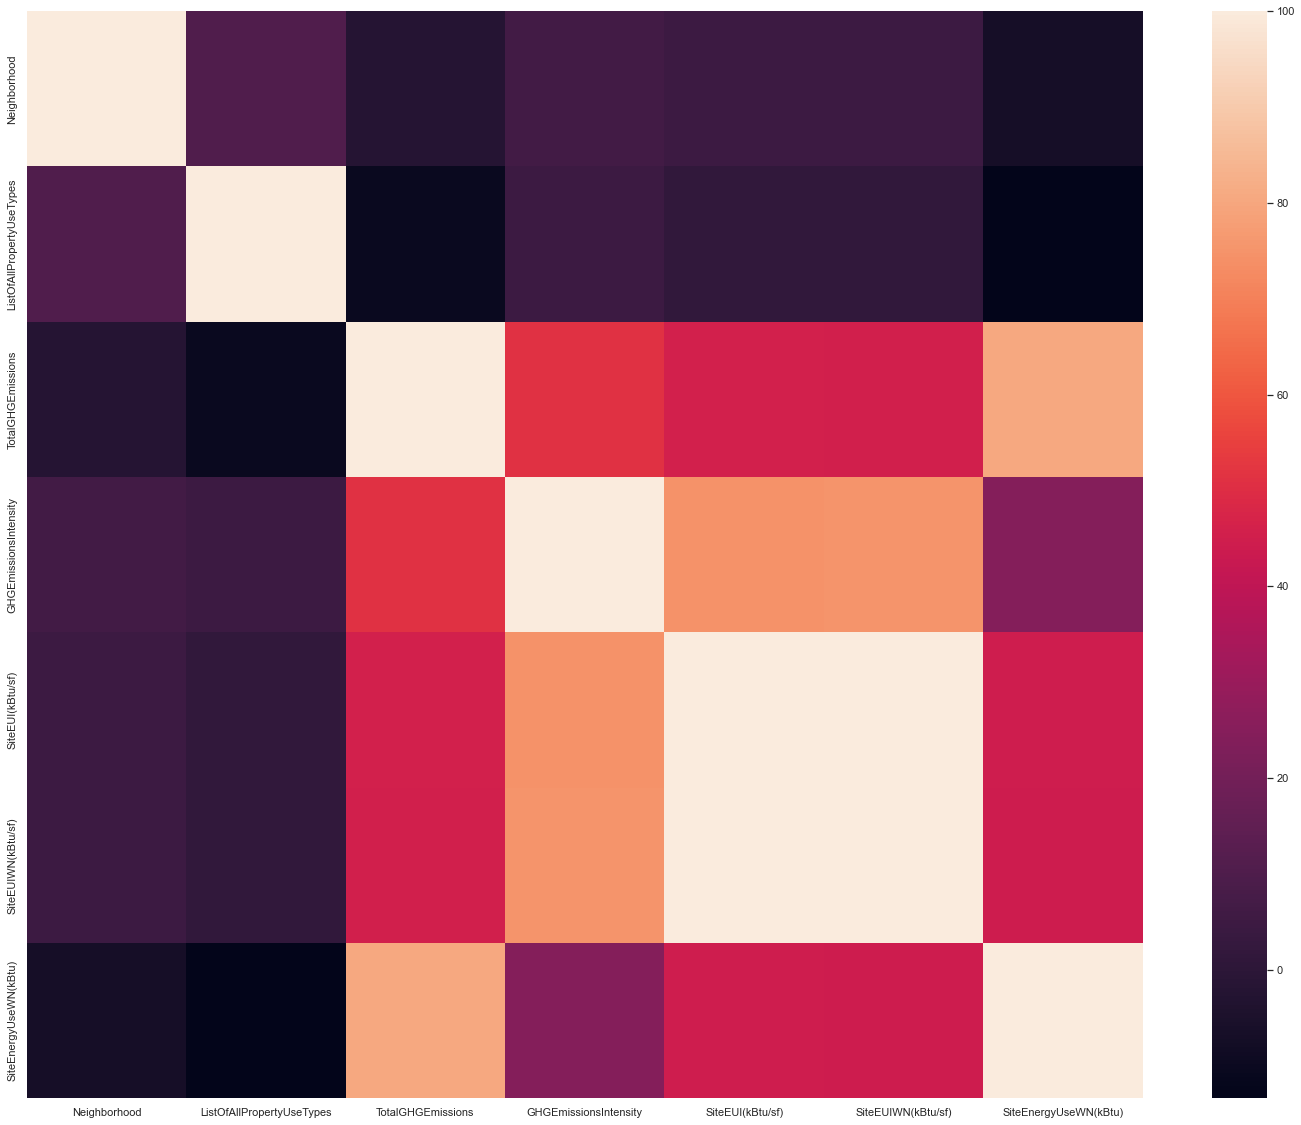

In [138]:
plt.figure(figsize= (25,20))
corr = Data_ORDENC_KNNI[cat_features + target].corr(method = 'pearson')*100
sns.heatmap(corr)

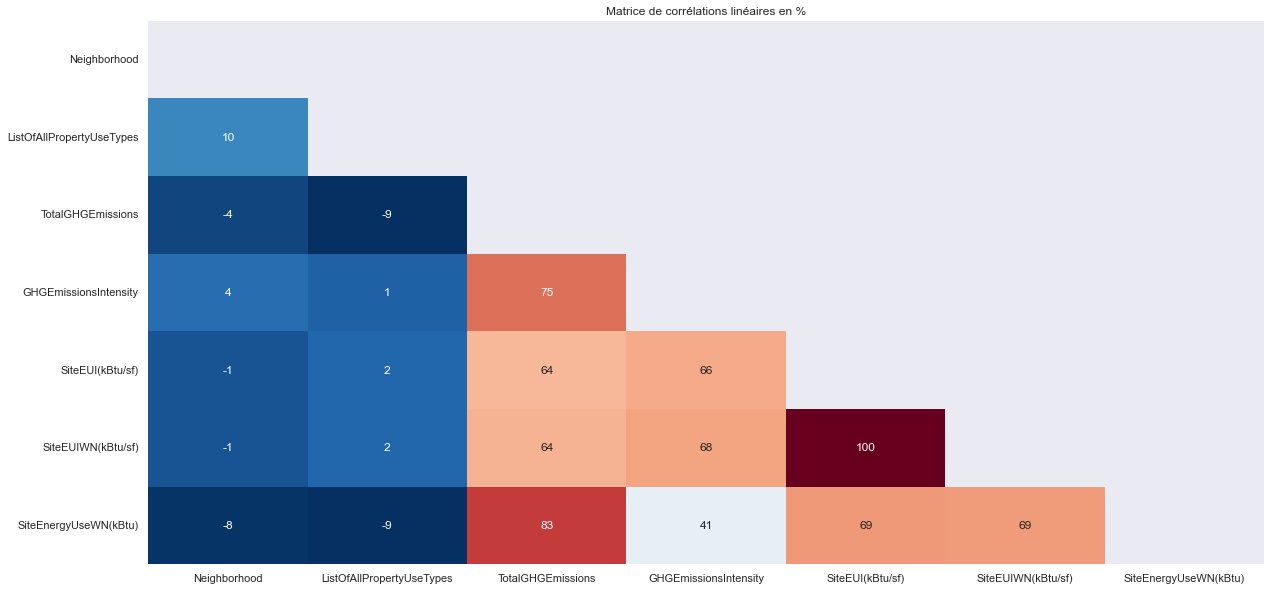

In [139]:
pearson_correlations = Data_ORDENC_KNNI[cat_features+ target].select_dtypes(include='float64').corr(method='spearman')*100.2
cleanning_mask = np.zeros_like(pearson_correlations)
upper_triangle = np.triu_indices_from(pearson_correlations)
cleanning_mask[upper_triangle] = 1

plt.figure(figsize=(20,10))

sns.heatmap(pearson_correlations, cmap="RdBu_r", mask = cleanning_mask, 
           annot = True, fmt=".0f", cbar=False)
plt.title("Matrice de corrélations linéaires en %")
plt.show()

Il n'y a pas énormément de redondance entre les données, excepté pour les features target. Mais nous garderons au final que deux variables cible, une correspond à l'énergie et l'autre aux émissions de C02

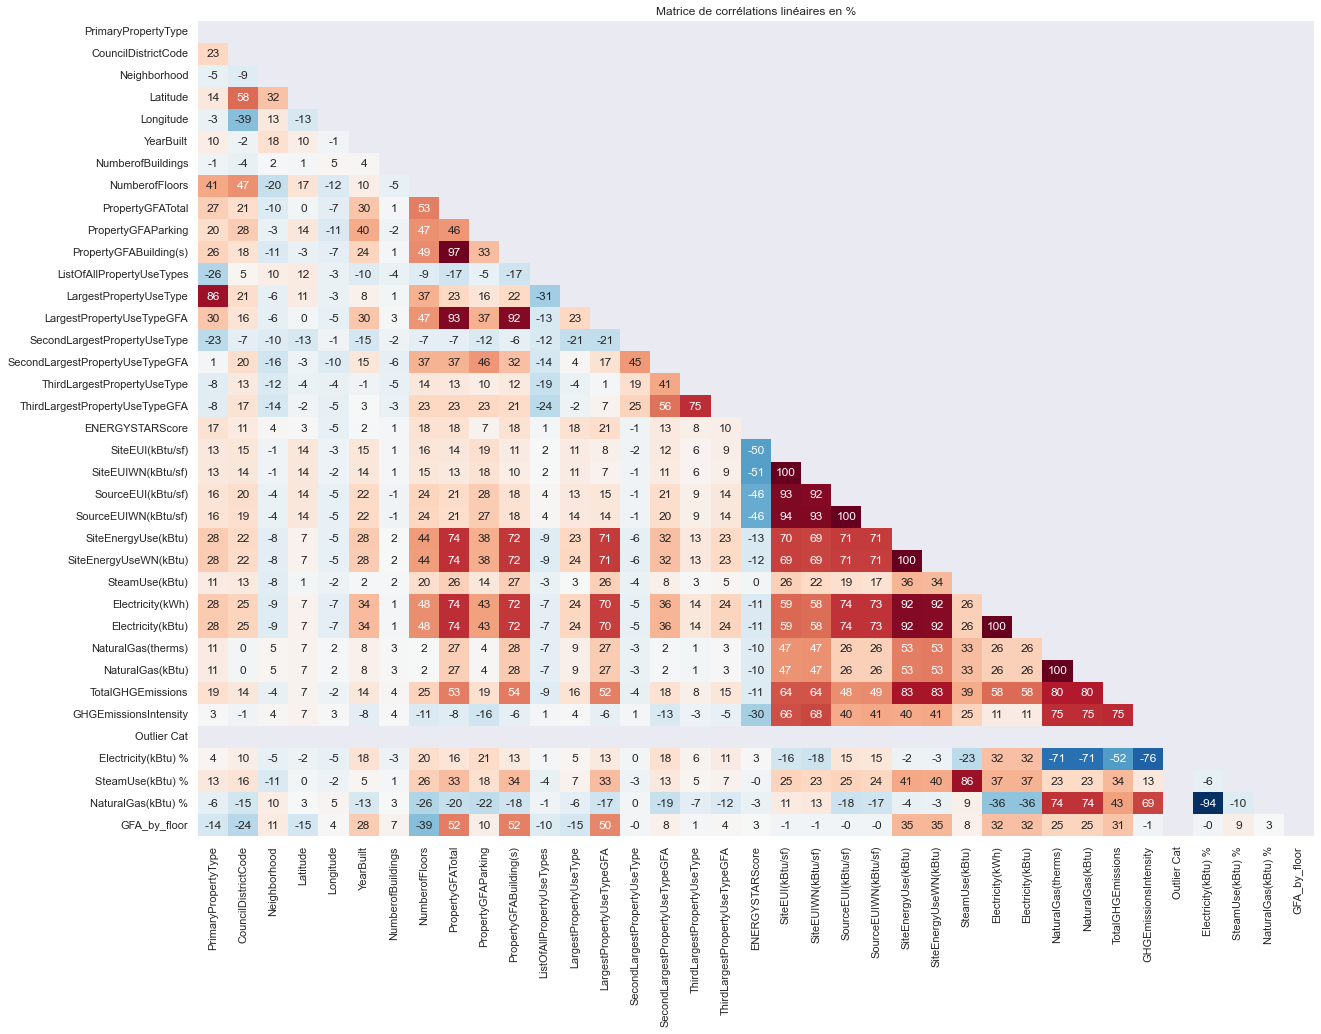

In [140]:
pearson_correlations = Data_ORDENC_KNNI.select_dtypes(include='float64').corr(method='spearman')*100.2
cleanning_mask = np.zeros_like(pearson_correlations)
upper_triangle = np.triu_indices_from(pearson_correlations)
cleanning_mask[upper_triangle] = 1

plt.figure(figsize=(20,15))

sns.heatmap(pearson_correlations, cmap="RdBu_r", mask = cleanning_mask, 
           annot = True, fmt=".0f", cbar=False)
plt.title("Matrice de corrélations linéaires en %")
plt.show()

On remarque que les features energy sont très correlées entre elles. On remarque que les features GFA sont correlés avec la consommation d'énergie. Donc potentiellemment, elles vont impacter le résultat.  De plus que la LargetUse type proprety est très correlés avec la surface. On peut supprimer les données trop correlées pour éviter la redondance.

In [141]:
CORR_Nutri = corr[['TotalGHGEmissions',"SiteEUIWN(kBtu/sf)"]].sort_values(by = "SiteEUIWN(kBtu/sf)" , ascending = False )
CORR_Nutri

,TotalGHGEmissions,SiteEUIWN(kBtu/sf)
SiteEUIWN(kBtu/sf),45.241276,100.000000
SiteEUI(kBtu/sf),45.540623,99.892758
GHGEmissionsIntensity,51.101583,75.066442
TotalGHGEmissions,100.000000,45.241276
SiteEnergyUseWN(kBtu),80.176696,43.973047
Neighborhood,-1.926945,4.700133
ListOfAllPropertyUseTypes,-10.672156,1.598012


<AxesSubplot:>

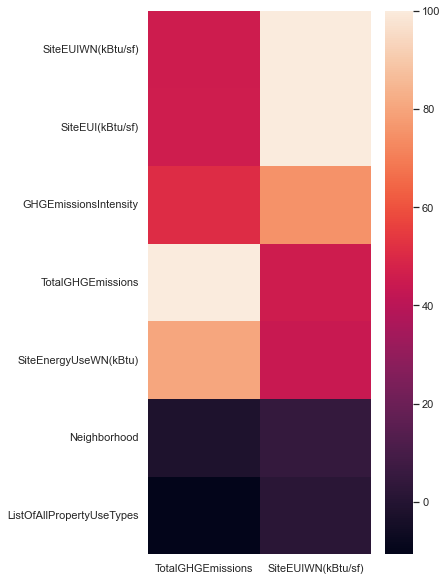

In [142]:
plt.figure(figsize= (5,10))
sns.heatmap(CORR_Nutri)

Les valeurs cibles sont très corrélées entre elles, nous allons en garder une pour chaque cible de prédiction de C0² et de consommation d'énergie.

## Choix de variables

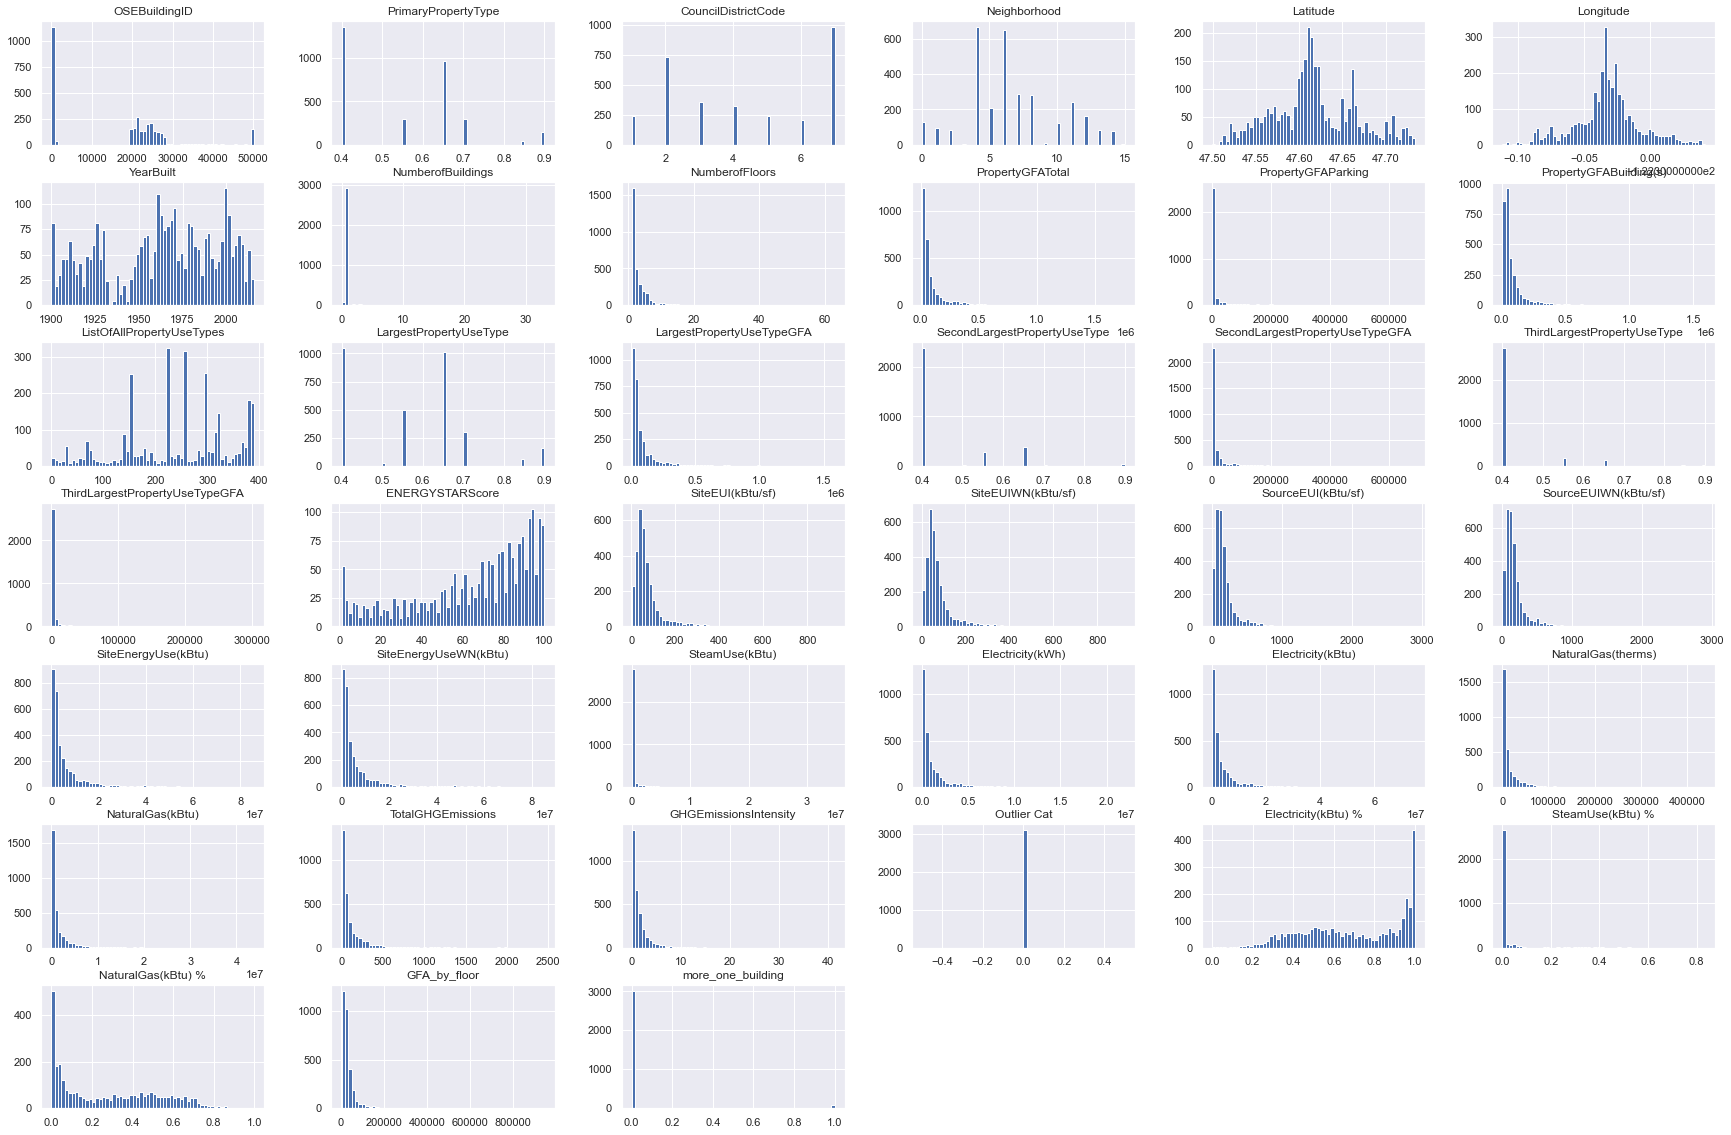

In [143]:
Data_ORDENC_KNNI.hist(bins=60, figsize=(30, 20))
plt.show()

Nous observons la distribution des données.

## Variables unique

Il y a la même ville et état dans les données. On peut les supprimer.

In [144]:
colonnes_to_drop.append("City")
colonnes_to_drop.append("State")

## Variable ID

On garde seulement une variable d'identification comme le councilDIstrictCode, on peut supprimer les autres car elles sont difficilement exploitables. On garde OSE BuildingID au cas où pour une concaténation.

In [145]:
for i in ["TaxParcelIdentificationNumber","Latitude","Longitude"] :
    colonnes_to_drop.append(i)

In [146]:
for i in [ 'DefaultData', 'Outlier'] :
    colonnes_to_drop.append(i)

## Ajout Variable Log 

On applique la fonction logarithmique au résultat. On fera nos prédiction sur le log des target. On remarque les targets augmentent très vites. Appliquer un logarithme permet de rentre les résultats plus linéaires.

In [147]:
Data_OHE_KNNI['Log TotalGHGEmissions']  = np.log(Data_OHE_KNNI['TotalGHGEmissions'])
Data_OHE_KNNI["Log SiteEnergyUseWN(kBtu)"]  = np.log(Data_OHE_KNNI["SiteEnergyUseWN(kBtu)"])
Data_OHE_ITE['Log TotalGHGEmissions'] = np.log(Data_OHE_ITE['TotalGHGEmissions'])
Data_OHE_ITE["Log SiteEnergyUseWN(kBtu)"] = np.log(Data_OHE_ITE["SiteEnergyUseWN(kBtu)"])

Data_ORDENC_KNNI['Log TotalGHGEmissions']  = np.log(Data_ORDENC_KNNI['TotalGHGEmissions'])
Data_ORDENC_KNNI["Log SiteEnergyUseWN(kBtu)"]  = np.log(Data_ORDENC_KNNI["SiteEnergyUseWN(kBtu)"])
Data_ORDENC_ITE['Log TotalGHGEmissions'] = np.log(Data_ORDENC_ITE['TotalGHGEmissions'])
Data_ORDENC_ITE["Log SiteEnergyUseWN(kBtu)"] = np.log(Data_ORDENC_ITE["SiteEnergyUseWN(kBtu)"])

C:\Users\cedri\AppData\Local\Temp/ipykernel_2368/2741960911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_OHE_KNNI['Log TotalGHGEmissions']  = np.log(Data_OHE_KNNI['TotalGHGEmissions'])
C:\Users\cedri\AppData\Local\Temp/ipykernel_2368/2741960911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_OHE_KNNI["Log SiteEnergyUseWN(kBtu)"]  = np.log(Data_OHE_KNNI["SiteEnergyUseWN(kBtu)"])


In [148]:
Data_OHE_ITE['Log TotalGHGEmissions']
Data_OHE_KNNI["Log SiteEnergyUseWN(kBtu)"]

0        15.824652
1        15.974742
2        18.118725
3        15.753792
4        16.500395
           ...    
10139    14.436138
10154    15.635081
10156    14.886983
10162    15.750408
10164    16.042653
Name: Log SiteEnergyUseWN(kBtu), Length: 3101, dtype: float64

In [149]:
Data_OHE_KNNI[["Log SiteEnergyUseWN(kBtu)","SiteEnergyUseWN(kBtu)"]]

,Log SiteEnergyUseWN(kBtu),SiteEnergyUseWN(kBtu)
0,15.824652,7456910.00
1,15.974742,8664479.00
2,18.118725,73937112.00
3,15.753792,6946800.50
4,16.500395,14656503.00
...,...,...
10139,14.436138,1860094.75
10154,15.635081,6169209.00
10156,14.886983,2919674.00
10162,15.750408,6923334.50


# Drop Data

In [150]:
Data_OHE_ITE

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,x0_ballard,x0_central,x0_delridge,x0_delridge neighborhoods,x0_downtown,x0_east,x0_greater duwamish,x0_lake union,x0_magnolia / queen anne,x0_nan,x0_north,x0_northeast,x0_northwest,x0_southeast,x0_southwest,x0_water,Log TotalGHGEmissions,Log SiteEnergyUseWN(kBtu)
0,1,0.90,7.0,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,0.90,88434.000000,0.4,0.0,0.40,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7456910.00,2.003882e+06,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,249.98,2.830,0.0,0.546060,0.277302,0.176638,7370.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.521381,15.824652
1,2,0.90,7.0,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,0.90,83880.000000,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8664479.00,0.000000e+00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,295.86,2.860,0.0,0.386609,0.000000,0.613391,9415.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.689886,15.974742
2,3,0.90,7.0,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,0.90,756493.000000,0.4,0.0,0.40,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,73937112.00,2.156655e+07,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,2089.28,2.190,0.0,0.682307,0.297113,0.020579,23320.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.644575,18.118725
3,5,0.90,7.0,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,0.90,61320.000000,0.4,0.0,0.40,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6946800.50,2.214446e+06,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,286.43,4.670,0.0,0.407519,0.325913,0.266567,6132.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.657494,15.753792
4,8,0.90,7.0,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,0.90,123445.000000,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,14656503.00,0.000000e+00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,505.01,2.880,0.0,0.378802,0.000000,0.621198,9754.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.224578,16.500395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,50170,0.65,5.0,47.70598,-122.33486,2016.0,1.0,2.0,44745.0,0.0,44745.0,0.40,44667.000000,0.4,0.0,0.40,0.0,76.0,41.600000,41.600000,130.800000,130.800000,1860094.75,1860094.75,3.652295e+05,5.451625e+05,1.860094e+06,7218.459986,7.218460e+05,N,7.70,0.172,0.0,0.676228,0.010000,0.313772,22372.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.041220,14.436138
10154,50186,0.65,7.0,47.60039,-122.33247,2016.0,1.0,8.0,213803.0,24987.0,188816.0,0.65,217888.000000,0.4,0.0,0.40,0.0,99.0,28.300000,28.300000,88.900000,88.900000,6169209.00,6169209.00,1.208355e+06,1.808092e+06,6.169208e+06,7218.460141,7.218460e+05,N,25.52,0.119,0.0,0.732333,0.010000,0.257667,26725.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.239462,15.635081
10156,50188,0.40,7.0,47.61582,-122.34615,2016.0,1.0,4.0,95576.0,24184.0,71392.0,0.6

In [151]:
Data_ORDENC_KNNI

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity,Outlier Cat,Electricity(kBtu) %,SteamUse(kBtu) %,NaturalGas(kBtu) %,GFA_by_floor,more_one_building,Log TotalGHGEmissions,Log SiteEnergyUseWN(kBtu)
0,1,0.90,7.0,4.0,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,138.0,0.90,88434.000000,0.4,0.0,0.40,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7456910.00,2.003882e+06,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,249.98,2.830,0.0,0.546060,0.277302,0.176638,7370.0,0,5.521381,15.824652
1,2,0.90,7.0,4.0,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,145.0,0.90,83880.000000,0.4,15064.0,0.55,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8664479.00,0.000000e+00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,295.86,2.860,0.0,0.386609,0.000000,0.613391,9415.0,0,5.689886,15.974742
2,3,0.90,7.0,4.0,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,138.0,0.90,756493.000000,0.4,0.0,0.40,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,73937112.00,2.156655e+07,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,2089.28,2.190,0.0,0.682307,0.297113,0.020579,23320.0,0,7.644575,18.118725
3,5,0.90,7.0,4.0,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,138.0,0.90,61320.000000,0.4,0.0,0.40,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6946800.50,2.214446e+06,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,286.43,4.670,0.0,0.407519,0.325913,0.266567,6132.0,0,5.657494,15.753792
4,8,0.90,7.0,4.0,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,150.0,0.90,123445.000000,0.4,68009.0,0.40,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,14656503.00,0.000000e+00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,505.01,2.880,0.0,0.378802,0.000000,0.621198,9754.0,0,6.224578,16.500395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,50170,0.65,5.0,12.0,47.70598,-122.33486,2016.0,1.0,2.0,44745.0,0.0,44745.0,194.0,0.40,44667.000000,0.4,0.0,0.40,0.0,76.0,41.600000,41.600000,130.800000,130.800000,1860094.75,1860094.75,3.515600e+03,5.451625e+05,1.860094e+06,678.968217,6.789684e+04,N,7.70,0.172,0.0,0.967725,0.001996,0.030279,22372.0,0,2.041220,14.436138
10154,50186,0.65,7.0,4.0,47.60039,-122.33247,2016.0,1.0,8.0,213803.0,24987.0,188816.0,256.0,0.65,217888.000000,0.4,0.0,0.40,0.0,99.0,28.300000,28.300000,88.900000,88.900000,6169209.00,6169209.00,6.496273e+04,1.808092e+06,6.169208e+06,2605.874029,2.605874e+05,N,25.52,0.119,0.0,0.964381,0.008378,0.027242,26725.0,0,3.239462,15.635081
10156,50188,0.40,7.0,4.0,47.61582,-122.34615,2016.0,1.0,4.0,95576.0,24184.0,71392.0,1.0,0.65,40074.898438,0.7,24853.0,0.40,24184.0,93.0,42.200000,41.500000,132.600000,130.200000,2973700.00,2919674.00,0.000000e+00,8.715415e+05,2.973700e+06,892.005305,8.920054e+04,N,12.30,0.129,0.0,0.972118,0.000000,0.027882,23894.0,0,2.509599,14.886983
10162,50212,0.40,3.0,5.0,47.63228,-122.31574,1912.0,5.0,1.0,23445.0,0.0,23445.0,336.0,0.40,23445.000000,0.4,0.0,0.40,0.0,NaN,299.400000,295.300000,461.600000,457.200000,7020576.50,6923334.50,4.150487e+05,4.838737e+05,1.650977e+06,53695.990000,5.369599e+06,N,292.01,12.455,0.0,0.368259,0.005022,0.626719,23445.0,1,5.676788,15.750408


In [152]:
Data_OHE_ITE.isna().sum()

OSEBuildingID                         0
PrimaryPropertyType                   0
CouncilDistrictCode                   8
Latitude                              8
Longitude                             8
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                    1013
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0


# Sauvegarde données

In [153]:
Data_Set = [Data_ORDENC_KNNI,Data_ORDENC_ITE, Data_OHE_KNNI, Data_OHE_ITE]

In [154]:
with pd.ExcelWriter('data_projet_3.xlsx') as writer :
    Data.to_excel(writer,sheet_name = 'Data')
    Data_ORDENC_KNNI.to_excel(writer,sheet_name = 'Data_ORDENC_KNNI')
    Data_ORDENC_ITE.to_excel(writer,sheet_name = 'Data_ORDENC_ITE')
    Data_OHE_KNNI.to_excel(writer,sheet_name = 'Data_OHE_KNNI')
    Data_OHE_ITE.to_excel(writer,sheet_name = 'Data_OHE_ITE')